# BC205: Algorithms for Bioinformatics.
## II. Sequence Analysis
### Christoforos Nikolaou

## Sequence Analysis
* In this class we will start looking into real biological problems, focusing on sequence analysis
* We will discuss some very basic concepts of computation such as hashing
* We will then turn to the implementation of the things we learnt last time using Brute Force and Divide and Conquer Approaches
* We will discuss a new approach (Binary Search) and implement it the context of a Genome Analysis

## The biological problems:  
* Compare different species on the basis of DNA composition
* Find evidence of horizontal gene transfer in a bacterial genome
* Locate the Origin of Repication of a Bacterial Genome

## Bioinformatics Warm-Up
1. You are given a DNA sequence
    * Can you count the number of nucleotides of each of the four bases (A, G, C, T)?
    * How many calculations will you need?
    * How will you implement it?
2. Now consider the same problem only instead of nucleotides we need to count the number of all 8-nucleotides. What do you need to consider to attack the problem?


## Aspects of DNA Composition
* GC content
* genomic signatures
* parity distributions
* k-mer frequencies


## GC content
We call GC content (or GC%) the ratio of (G+C) nucleotides of a given DNA sequence
* Why is it important? G-C pairs are linked with 3 hydrogen bonds, while A-T ones with 2. High GC genomes are more stable in terms of physical chemistry.


## GC is related to:
* Biochemical level: Thermal stability
* Evolutionary level: Organism Phylogeny, Mutational pressures
* Genomic level: Genome size
* Functional level: Functional role of underlying sequences
* and many more

## GC content in Genomic Sequences
* Bacteria: GC% is highly variable **between** species
* Bacteria: GC% is rather homogeneous **within** each genome
* Bacteria: GC% can be used in their classification


## GC content in Genomic Sequences
* Eukaryotes: Very homogeneous overall GC% (~40-45% in all animals)
* Eukaryotes: Fluctuation of GC contentalong the chromosomes and organization in areas of (rather) stable GC%
* Eukaryotes: Regions of stable high/low GC content that segregate mammalian genomes in isochores


## Problem 1: GC content in Bacterial Genomes
* Given the DNA sequence of a Bacterial Genome, calculate its GC content:
    * Read the Sequence
    * Enumerate G
    * Enumerate C
    * Divide (G+C) over length of the sequence

## GCContent. Pseudocode
* Τhe idea is to **exhaustively** enumerate all mononucleotides, therefore our approach is a very basic Brute Force approach.
* Given that the content of the sequence is unknown we have no other choice.
* We will proceed by reading each nucleotide in the sequence and check its value. Then increment a variable each time we find a G or a C.

## GCContent: Implementation (naive)


In [ ]:
# Naive GC content

import regex as re
f=open('/home/christoforos/Dropbox/Programs/PythonScripts/ecoli.fa', 'r')

seq = ""
window=1000
total = 0
nG=nC=0
GCCont=0
times=0;
for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        total=total+length
        seq=seq+line[0:length-1]

for k in range(len(seq)):
    if(seq[k]=="G"):
        nG+=1
    elif(seq[k]=="C"):
        nC+=1
GCContent=(nG+nC)/len(seq)
print(GCContent)


## GCContent: Implementation (using Python's count function)


In [ ]:
import regex as re

f=open('/home/christoforos/Dropbox/Programs/PythonScripts/ecoli.fa', 'r')

seq = ""
window=1000
total = 0
nG=nC=0
GCCont=0
times=0;
for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        total=total+length
        seq=seq+line[0:length-1]
f.close()
nC=seq.count("C")
nG=seq.count("G")
GCCont=(nG+nC)/len(seq);
print(GCCont)

## Hands on #1:
* Download a couple of bacterial genome sequences from ENSEMBL Bacteria (http://bacteria.ensembl.org/index.html)
* Implement GC content
* Report the results

* An example would be

Genome | GC |
------------ | -------------
a-Bac1 | 0.334
e-Bac2 | 0.595
e-Bac3 | 0.668
g-Bac4 | 0.409
e-Bac5 | 0.511
a-Bac6 | 0.352
a-Bac7 | 0.354
g-Bac8 | 0.418
g-Bac9 | 0.434
e-Bac8 | 0.627


## Problem 2: Variability of GC content _between_ Bacterial Genomes
* Given a number of bacterial genomes:  
    - Get their genome sequences  
    - Calculate the GC contents  
    - Calculate differences between the GC contents  
    - Rank genomes based on their differences  
* Pseudocode:
    * Perform GC_content on each of the genomes you downloaded  
    * Calculate D_(i,j)=|GC_i-GC_j| over all i,j  
    * Sort D_(i,j)

## Problem 2: Approach
* We could do this very easily with R but it can also be done otherwise

For example


In [6]:
f=open('/home/christoforos/Dropbox/Teaching/BC205/files/GCContent.tsv', 'r')

i=0
GCC={}
for line in f:
    i=i+1
    if(i>1):
        species=line.split()[0]
        GC=line.split()[1]
        GCC[species]=float(GC)

gcdistances={}
for genome1 in GCC.keys():
    for genome2 in GCC.keys():
        pair=genome1+":"+genome2
        gcdistances[pair]=abs(float(GCC[genome1])-float(GCC[genome2]))
        gcdistances[pair]=round(gcdistances[pair],2)
        print(pair, round(gcdistances[pair],3))

sorted(gcdistances.items(), key=lambda x: x[1])      


a-Bac1:a-Bac1 0.0
a-Bac1:e-Bac2 0.26
a-Bac1:e-Bac3 0.33
a-Bac1:g-Bac4 0.07
a-Bac1:e-Bac5 0.18
a-Bac1:a-Bac6 0.02
a-Bac1:a-Bac7 0.02
a-Bac1:g-Bac8 0.08
a-Bac1:g-Bac9 0.1
a-Bac1:e-Bac8 0.29
e-Bac2:a-Bac1 0.26
e-Bac2:e-Bac2 0.0
e-Bac2:e-Bac3 0.07
e-Bac2:g-Bac4 0.19
e-Bac2:e-Bac5 0.08
e-Bac2:a-Bac6 0.24
e-Bac2:a-Bac7 0.24
e-Bac2:g-Bac8 0.18
e-Bac2:g-Bac9 0.16
e-Bac2:e-Bac8 0.03
e-Bac3:a-Bac1 0.33
e-Bac3:e-Bac2 0.07
e-Bac3:e-Bac3 0.0
e-Bac3:g-Bac4 0.26
e-Bac3:e-Bac5 0.16
e-Bac3:a-Bac6 0.32
e-Bac3:a-Bac7 0.31
e-Bac3:g-Bac8 0.25
e-Bac3:g-Bac9 0.23
e-Bac3:e-Bac8 0.04
g-Bac4:a-Bac1 0.07
g-Bac4:e-Bac2 0.19
g-Bac4:e-Bac3 0.26
g-Bac4:g-Bac4 0.0
g-Bac4:e-Bac5 0.1
g-Bac4:a-Bac6 0.06
g-Bac4:a-Bac7 0.05
g-Bac4:g-Bac8 0.01
g-Bac4:g-Bac9 0.03
g-Bac4:e-Bac8 0.22
e-Bac5:a-Bac1 0.18
e-Bac5:e-Bac2 0.08
e-Bac5:e-Bac3 0.16
e-Bac5:g-Bac4 0.1
e-Bac5:e-Bac5 0.0
e-Bac5:a-Bac6 0.16
e-Bac5:a-Bac7 0.16
e-Bac5:g-Bac8 0.09
e-Bac5:g-Bac9 0.08
e-Bac5:e-Bac8 0.12
a-Bac6:a-Bac1 0.02
a-Bac6:e-Bac2 0.24
a-Bac6:e-Bac3 0.32
a

[('a-Bac1:a-Bac1', 0.0),
 ('e-Bac2:e-Bac2', 0.0),
 ('e-Bac3:e-Bac3', 0.0),
 ('g-Bac4:g-Bac4', 0.0),
 ('e-Bac5:e-Bac5', 0.0),
 ('a-Bac6:a-Bac6', 0.0),
 ('a-Bac6:a-Bac7', 0.0),
 ('a-Bac7:a-Bac6', 0.0),
 ('a-Bac7:a-Bac7', 0.0),
 ('g-Bac8:g-Bac8', 0.0),
 ('g-Bac9:g-Bac9', 0.0),
 ('e-Bac8:e-Bac8', 0.0),
 ('g-Bac4:g-Bac8', 0.01),
 ('g-Bac8:g-Bac4', 0.01),
 ('a-Bac1:a-Bac6', 0.02),
 ('a-Bac1:a-Bac7', 0.02),
 ('a-Bac6:a-Bac1', 0.02),
 ('a-Bac7:a-Bac1', 0.02),
 ('g-Bac8:g-Bac9', 0.02),
 ('g-Bac9:g-Bac8', 0.02),
 ('e-Bac2:e-Bac8', 0.03),
 ('g-Bac4:g-Bac9', 0.03),
 ('g-Bac9:g-Bac4', 0.03),
 ('e-Bac8:e-Bac2', 0.03),
 ('e-Bac3:e-Bac8', 0.04),
 ('e-Bac8:e-Bac3', 0.04),
 ('g-Bac4:a-Bac7', 0.05),
 ('a-Bac7:g-Bac4', 0.05),
 ('g-Bac4:a-Bac6', 0.06),
 ('a-Bac6:g-Bac4', 0.06),
 ('a-Bac7:g-Bac8', 0.06),
 ('g-Bac8:a-Bac7', 0.06),
 ('a-Bac1:g-Bac4', 0.07),
 ('e-Bac2:e-Bac3', 0.07),
 ('e-Bac3:e-Bac2', 0.07),
 ('g-Bac4:a-Bac1', 0.07),
 ('a-Bac6:g-Bac8', 0.07),
 ('g-Bac8:a-Bac6', 0.07),
 ('a-Bac1:g-Bac8', 0.08)

* Notice how smaller values are obtained for same bacterial family (a-, g- and e-proteobacteria)

## Problem 3: What about different regions of the genome?
* We just saw how genomic GC% values may be used to draw conclusions for bacterial phylogeny
* But: How representative is the GC% value you calculated above?
* And: How efficiently can it be used to describe a genome?

## Problem 3: Why should we care?
* We mentioned that GC% is stable within bacterial genomes
* **But** Some areas of bacterial genomes are special
* Parts of the bacterial genome have been "horizontally" (as opposed to vertically, i.e. from their "mom") transferred from other species.


## Problem 3: Stability of GC content _along_ Bacterial Genomes
* Regions of "strange", or "deviating" GC% values in a given genome are red flags of HGT. The problem now is:
    * Given a bacterial genome sequence:  
    * Locate regions of the genome where horizontal gene transfer may have occurred.

## Problem 3: Approach
* Choose a window to scan your sequence. This will be your resolution
* Calculate GC per window
* Try to locate GC values that deviate from the genome average

## Problem 3: The core
* We basically repeat the approach for GC content but now we calculate one value for each window


In [7]:
f=open('/home/christoforos/Dropbox/Teaching/BC205/files/Staaur.fa', 'r')

seq = ""
window=1000
nG=nC=0
GCCont=[]

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        total=total+length
        seq=seq+line[0:length-1]
f.close()

step=100
times=int(len(seq)/step);

for i in range(times):
    DNA=seq[i*step:i*step+window]
    nC=DNA.count("C")
    nG=DNA.count("G")
    GCCont.append((nG+nC)/window)


## Hands-on #2:
* Get the genome sequence of St. aureus
* Implement Sliding GC
* Locate positions in the genome with extreme values of GC
* The problem is: *What do we mean by "extreme values"?** How do we define "extreme"?


## Problem 3: Statistics Interlude
* Given a set/sample of values, how can we decide on whether a value could be part of that sample or not?
* In our problem: We know that the GC% of bacteria tends to be characteristic of the genome. Can we "spot" regions of the genome that bear GC% values that are _different_ from that characteristic value?
* Q1: How will we define that characteristic value?
* Q2: How will we quantify the _difference_ as big enough or not?

## Problem 3: Theoretical basis (simplified)
* Central Limit Theorem (simplified):     
    * Regardless of the underlying distribution, the mean of a large number of samples follow the normal distribution.  
    * We can thus model GC values per window based on the normal distribution

## Problem 3: The statistics
* We will model the "characteristic value" as the mean of GC values for all windows
* We will also calculate the standard deviation of these values to assess the variance
* We will then apply...

## Z-transformation
* Given a value x, we can compare x to a normal distribution with mean=m and standard deviation=std with the z-score:
    Z(x)= (x - m)/std  
    Z(x) is thus the difference of x from m in units of standard deviation.  
    Knowing that in a normal distribution ~99.5% of the values fall within +/-3*std a value of Z(x)>3 or Z(x)<-3 makes it highly unlikely that x is part of our distribution.

## Problem 3. Predicting HGT locations
* We can now combine sliding GC content calculations with a Z-score transformation and a filtering for |Z|>=3



In [9]:
import regex as re
import numpy as np

f=open('/home/christoforos/Dropbox/Teaching/BC205/files/Staaur.fa', 'r')

seq = ""
window=1000
nG=nC=0
GCCont=[]

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        seq=seq+line[0:length-1]
f.close()

step=100
times=int(len(seq)/step);

for i in range(times):
    DNA=seq[i*step:i*step+window]
    nC=DNA.count("C")
    nG=DNA.count("G")
    GCCont.append((nG+nC)/window)

# Calculate Z-scores
mGC=np.mean(GCCont)
sdGC=np.std(GCCont)
zGC=(GCCont-mGC)/sdGC
for i in range(len(zGC)):
    if abs(zGC[i])>=3:
        print(i*1000, zGC[i])


3117000 3.3056871660938962
3118000 3.510729542254593
3119000 3.7450636864382467
3120000 3.80364722248416
3121000 3.6571883823693767
3122000 3.422854238185723
4462000 -3.138501798956574
4463000 -3.109210030933617
6100000 3.0713530219102427
6101000 4.125856670736683
6102000 4.272315510851466
6103000 4.77027556724173
6104000 5.121776783517211
6105000 5.180360319563124
6106000 6.000529824205912
6107000 6.088405128274782
6108000 6.146988664320696
6109000 5.883362752114085
6110000 5.561153303861561
6111000 5.443986231769735
6112000 5.736903911999302
6113000 5.414694463746778
6114000 5.268235623631994
6115000 5.180360319563124
6116000 4.975317943402427
6117000 4.887442639333557
6118000 4.740983799218774
6119000 4.77027556724173
6120000 4.77027556724173
6121000 4.740983799218774
6122000 4.213731974805553
6123000 4.184440206782596
6124000 4.096564902713726
6125000 4.037981366667814
6126000 3.62789661434642
6127000 3.1006447899331993
6132000 3.0127694858643292
6133000 3.129936557956156
6134000 3

19821000 3.0420612538872858
25795000 -3.109210030933617
27480000 -3.0799182629106605
27640000 -3.021334726864747
27641000 -4.075838375691188
27642000 -5.0424667204487585
27643000 -6.067678601252243
27644000 -6.946431641940943
27645000 -7.913059986698514


## Problem 2: Revisited

* Background DNA composition has some **functional** role besides simply reflecting mutational pressures
* This means that in some cases we need to know why the local composition is guided by _other_ aspects of molecular evolutio. E.g. why would rRNA genes be G+C-rich even in AT-rich genomes?
* We need to find a way to control for _background nucleotide composition_

## Problem 2 Revisited: Distinguishing between genomes through their sequence composition
1. Going beyond the GC content
2. Going beyond simple bases (mononucleotides, k=1)
3. Analyzing all dinucleotide frequencies of k=2

* Pseudocode:
    * For each kmer in _4^k_ k-mers
    * Calculate N(kmer)
    * Create a table

## Problem: How to count k-mer frequencies
* For mononucleotides we did it with a Brute Force approach. However the mononucleotides are 4. The k-mers are 4^k.
* How can we count the frequencies of k-mers?
  1. Do we need **all** k-mers?
  2. Do we need to check each k-mer at every step?
* How many calculations do we need if we answer "yes" to 1,2 above.


## Solution: Hashing Strategy instead of Brute Force
* Read the sequence in chunks of _k_ nucleotides
* For each subsequence increment a dictionary value with the subsequence as key

## Problem 2 Revisited: K-mer frequencies


In [10]:
import regex as re

f=open('/home/christoforos/Dropbox/Teaching/BC205/files/Staaur.fa', 'r')

seq = ""
k=2
kmers={}

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        seq=seq+line[0:length-1]
f.close()

for i in range(len(seq)-k):
    DNA=seq[i:i+k]
    if DNA not in kmers.keys():
        kmers[DNA]=1
    else:
        kmers[DNA]+=1

{k: float(v) / len(seq) for k, v in kmers.items()}


{'GT': 0.052417641124766205,
 'TA': 0.09542485456825499,
 'AT': 0.11214421533772755,
 'TT': 0.12211817633673684,
 'AC': 0.0527258121046812,
 'CT': 0.04827324782914885,
 'TC': 0.05299347234545244,
 'CA': 0.06572144020018092,
 'AA': 0.12267628410904767,
 'CG': 0.02563642552046353,
 'TG': 0.06441677737793518,
 'GG': 0.02547908470325341,
 'CC': 0.025711298047273862,
 'AG': 0.04831231175618033,
 'GA': 0.05203640613318122,
 'GC': 0.033911829099659674}

## Problem 2 Revisited: A table of _4^k_ frequencies of occurrence  
Base | A | T | G | C
------------- | ------------- | ------------- | ------------- | -------------
A | 0.090 | 0.112 | 0.048 | 0.053
T | 0.095 | 0.090 | 0.064 | 0.053
G | 0.052 | 0.052 | 0.023 | 0.034
C | 0.066 | 0.048 | 0.026 | 0.023

* Values may be seen as "probabilities" of finding each k-mer in the sequence
* Can we use the notion of the probability to modify the table so that we get rid of the background nucleotide composition?

## Problem 2 Revisited: Removing Background Composition
* The problem stated above persists at the level of k-mers: The background DNA composition may affect our results
* At the k-mer level we can remove the background using ratios of observed/expected frequencies
* Which is the expected frequency of a given k-mer?

## Problem 2 Revisited: Observed/Expected(o/e) k-mer frequencies
* Mathematics Interlude:
    * Assume two events A, B that are linked with each other
    * We then say that A and B are dependent (or conditioned) and we have a "conditional probability" of A happening given B is also happening
    * We can think of k-mers the same way: a k-mer is more probable to occur if its constituent mono-mers are occurring
    * Bottomline: Any given k-mer's frequency of occurrence is dependent on the frequencies of occurrence of its mononucleotides. Thus:

Given a k-mer of length k the o/e-ratio frequency is defined as:  
  _R[N_1N_2..N_k]=F[N_1N_2..N_k]/(F[N_1]F[N_2]..F[N_k])_

In this way we can define a new table of modified frequencies that is independent of mono-nucleotide composition

## Problem 2 Revisited: Observed/Expected K-mer frequencies


In [11]:
import regex as re

f=open('/home/christoforos/Dropbox/Teaching/BC205/files/Staaur.fa', 'r')

seq = ""
k=2
kmers={}

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        seq=seq+line[0:length-1]
f.close()

pnuc={}
for i in range(len(seq)):
    nuc=seq[i]
    if nuc not in pnuc.keys():
        pnuc[nuc]=1
    else:
        pnuc[nuc]+=1

pnuc={k: float(v) / len(seq) for k, v in pnuc.items()}

for i in range(len(seq)-k):
    DNA=seq[i:i+k]
    if DNA not in kmers.keys():
        kmers[DNA]=1
    else:
        kmers[DNA]+=1

kmers={k: float(v) / len(seq) for k, v in kmers.items()}

rkmers=kmers
for kmer in kmers.keys():
    nuc1=list(kmer)[0]
    nuc2=list(kmer)[1]
    rkmers[kmer]=round(kmers[kmer]/(pnuc[nuc1]*pnuc[nuc2]),3)

print(rkmers)


{'GT': 0.955, 'TA': 0.848, 'AT': 0.997, 'TT': 1.088, 'AC': 0.949, 'CT': 0.872, 'TC': 0.957, 'CA': 1.183, 'AA': 1.088, 'CG': 0.946, 'TG': 1.174, 'GG': 0.949, 'CC': 0.94, 'AG': 0.878, 'GA': 0.946, 'GC': 1.252}


## Problem 2 Revisited: A table of o/e 4^k frequencies of occurrence  
Base | A | G | C | T
------------- | ------------- | ------------- | ------------- | -------------
A | 0.800 | 0.997 | 0.878 | 0.949
G | 0.848 | 0.799 | 1.174 | 0.957
C | 0.946 | 0.955 | 0.848 | 1.252
T | 1.183 | 0.872 | 0.946 | 0.841

* Notice how values now go >1. What does this mean?
* How is this table better (or not) than the previous one?

## Genomic Signatures: Comparing o/e k-mer composition
* Genomic Signatures are defined as the table of o/e k-mers for a given genome
* We can use these tables to analyze distances between genomes. (Hint: even eukaryote genomes!)


## Hands-on #3:
* Get chromosome 1 from (human, mouse, fly, worm, yeast)
* Use a genomic signature approach to cluster genomic signatures from different genomes
* Calculate the distance between rho_xy(p) and rho_xy(s) to create a table of distances.

## Problem 4: Finding the DNA Replication in a bacterial genome
* Bacterial Genomes replicated their genome starting at one point and proceeding towards the opposite point in  the circular genome from both directions.
* Bacterial genomes also have a particular distribution of nucleotides along their genome
* The difference of A-T (and G-C) complementary nucleotides goes through a sort of "phase transition" that splits the genome approximately in half.
* Do you know what this split is?
* Do you know why it is so?


## How is this related to Sequence Analysis?
* Due to the pioneering work of E. Chargaff we know that A~T and G~C in **single-stranded DNA**
* We know that this holds for all complete genomes except very few exceptions
* The exceptions are the few genomes that **do not** replicate symmetrically
* DNA-strand parity:
    * Strand X is replicated in-continuously
    * Accumulates more substitutions
    * If substitutions are biased the strand will guide the change in both strands through base-pairing


## Approaching the problem
* We thus expect (and observe) the parity to be violated and that this violation occurs symmetrically on either side of the OriC
* We are looking for a way to locate this _phase transition_ in the parity violation
* We thus need:
    * A measure of the parity
    * A way to monitor this measure along the genome
    * A way to locate abrupt changes in its values

## Breaking the problem into pieces
1. Analyze the DNA composition _along_ the genome
2. Calculate a quantity that will be informative
3. Create a condition that will test the location of the Ori

* Pseudocode: Given a bacterial genome:
    * Count nucleotides in windows of N base pairs
    * Calculate the scaled AT-skew as (A-T)/(A+T)
    * Create an array of the skew values along the genome
    * Locate the transition point

## Problem 4: Parity Measure Implementation


In [15]:
f=open('/home/christoforos/Dropbox/Teaching/BC205/files/Staaur.fa', 'r')

seq = ""

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        seq=seq+line[0:length-1]
f.close()

window=1000
step=100
times=int(len(seq)/step)

for i in range(times):
	DNA=seq[i*step:i*step+window]
	A=DNA.count("A")
	T=DNA.count("T")
	C=DNA.count("C")
	G=DNA.count("G")
	print(i*step,"\t",i*step+window,"\t",float(A-T)/(A+T))

0 	 1000 	 -0.06744868035190615
100 	 1100 	 -0.08394698085419734
200 	 1200 	 -0.061946902654867256
300 	 1300 	 -0.061946902654867256
400 	 1400 	 -0.08272859216255443
500 	 1500 	 -0.08613138686131387
600 	 1600 	 -0.07759882869692533
700 	 1700 	 -0.11627906976744186
800 	 1800 	 -0.12954876273653565
900 	 1900 	 -0.1819505094614265
1000 	 2000 	 -0.21511627906976744
1100 	 2100 	 -0.21865889212827988
1200 	 2200 	 -0.240981240981241
1300 	 2300 	 -0.20234604105571846
1400 	 2400 	 -0.19642857142857142
1500 	 2500 	 -0.18518518518518517
1600 	 2600 	 -0.18649045521292218
1700 	 2700 	 -0.14666666666666667
1800 	 2800 	 -0.1411589895988113
1900 	 2900 	 -0.12612612612612611
2000 	 3000 	 -0.08952959028831563
2100 	 3100 	 -0.07692307692307693
2200 	 3200 	 -0.07878787878787878
2300 	 3300 	 -0.11144578313253012
2400 	 3400 	 -0.1025260029717682
2500 	 3500 	 -0.1019202363367799
2600 	 3600 	 -0.1031390134529148
2700 	 3700 	 -0.12143928035982009
2800 	 3800 	 -0.1394658753709199
290

28800 	 29800 	 0.04499274310595065
28900 	 29900 	 0.07338129496402877
29000 	 30000 	 0.041726618705035974
29100 	 30100 	 0.014326647564469915
29200 	 30200 	 0.012987012987012988
29300 	 30300 	 -0.04927536231884058
29400 	 30400 	 -0.03498542274052478
29500 	 30500 	 -0.07153284671532846
29600 	 30600 	 -0.06609195402298851
29700 	 30700 	 -0.06332842415316642
29800 	 30800 	 -0.09417040358744394
29900 	 30900 	 -0.12859304084720122
30000 	 31000 	 -0.0963855421686747
30100 	 31100 	 -0.08108108108108109
30200 	 31200 	 -0.10557184750733138
30300 	 31300 	 -0.08394698085419734
30400 	 31400 	 -0.11210762331838565
30500 	 31500 	 -0.10911808669656203
30600 	 31600 	 -0.12859304084720122
30700 	 31700 	 -0.13185185185185186
30800 	 31800 	 -0.12705530642750373
30900 	 31900 	 -0.12650602409638553
31000 	 32000 	 -0.1411229135053111
31100 	 32100 	 -0.15773353751914243
31200 	 32200 	 -0.11455108359133127
31300 	 32300 	 -0.09345794392523364
31400 	 32400 	 -0.07219662058371736
31500

60500 	 61500 	 0.08196721311475409
60600 	 61600 	 0.11011904761904762
60700 	 61700 	 0.07738095238095238
60800 	 61800 	 0.07164179104477612
60900 	 61900 	 0.09226190476190477
61000 	 62000 	 0.0718562874251497
61100 	 62100 	 0.0729483282674772
61200 	 62200 	 0.09715994020926756
61300 	 62300 	 0.1027190332326284
61400 	 62400 	 0.09523809523809523
61500 	 62500 	 0.10843373493975904
61600 	 62600 	 0.08035714285714286
61700 	 62700 	 0.08124076809453472
61800 	 62800 	 0.08771929824561403
61900 	 62900 	 0.06607929515418502
62000 	 63000 	 0.06704707560627675
62100 	 63100 	 0.07391910739191074
62200 	 63200 	 0.0446927374301676
62300 	 63300 	 0.012622720897615708
62400 	 63400 	 0.022598870056497175
62500 	 63500 	 -0.002824858757062147
62600 	 63600 	 0.004316546762589928
62700 	 63700 	 -0.034482758620689655
62800 	 63800 	 -0.03498542274052478
62900 	 63900 	 -0.02346041055718475
63000 	 64000 	 -0.05547226386806597
63100 	 64100 	 -0.0724191063174114
63200 	 64200 	 -0.073

90000 	 91000 	 -0.08346456692913386
90100 	 91100 	 -0.12135176651305683
90200 	 91200 	 -0.0990990990990991
90300 	 91300 	 -0.08394698085419734
90400 	 91400 	 -0.0787518573551263
90500 	 91500 	 -0.05726872246696035
90600 	 91600 	 -0.0659025787965616
90700 	 91700 	 -0.04136947218259629
90800 	 91800 	 -0.05413105413105413
90900 	 91900 	 -0.06179775280898876
91000 	 92000 	 -0.05702364394993046
91100 	 92100 	 -0.04189944134078212
91200 	 92200 	 -0.08835904628330996
91300 	 92300 	 -0.11173974540311174
91400 	 92400 	 -0.12167832167832168
91500 	 92500 	 -0.1376912378303199
91600 	 92600 	 -0.15492957746478872
91700 	 92700 	 -0.14929577464788732
91800 	 92800 	 -0.1479944674965422
91900 	 92900 	 -0.136986301369863
92000 	 93000 	 -0.14246947082767977
92100 	 93100 	 -0.1278600269179004
92200 	 93200 	 -0.09428950863213811
92300 	 93300 	 -0.08748317631224764
92400 	 93400 	 -0.058186738836265225
92500 	 93500 	 -0.025991792065663474
92600 	 93600 	 0.005555555555555556
92700 	

126600 	 127600 	 -0.1512481644640235
126700 	 127700 	 -0.1487481590574374
126800 	 127800 	 -0.16129032258064516
126900 	 127900 	 -0.16981132075471697
127000 	 128000 	 -0.216255442670537
127100 	 128100 	 -0.24495677233429394
127200 	 128200 	 -0.2630057803468208
127300 	 128300 	 -0.2698412698412698
127400 	 128400 	 -0.27116212338593976
127500 	 128500 	 -0.31877729257641924
127600 	 128600 	 -0.3217893217893218
127700 	 128700 	 -0.32756132756132755
127800 	 128800 	 -0.28448275862068967
127900 	 128900 	 -0.26180257510729615
128000 	 129000 	 -0.21246458923512748
128100 	 129100 	 -0.17221418234442837
128200 	 129200 	 -0.1273792093704246
128300 	 129300 	 -0.0744047619047619
128400 	 129400 	 -0.04804804804804805
128500 	 129500 	 -0.02262443438914027
128600 	 129600 	 0.0622154779969651
128700 	 129700 	 0.09785932721712538
128800 	 129800 	 0.130568356374808
128900 	 129900 	 0.12461059190031153
129000 	 130000 	 0.11180124223602485
129100 	 130100 	 0.09502262443438914
1292

155800 	 156800 	 0.10222222222222223
155900 	 156900 	 0.11764705882352941
156000 	 157000 	 0.10782865583456426
156100 	 157100 	 0.07759882869692533
156200 	 157200 	 0.06432748538011696
156300 	 157300 	 0.05813953488372093
156400 	 157400 	 0.0755813953488372
156500 	 157500 	 0.06970128022759602
156600 	 157600 	 0.07584269662921349
156700 	 157700 	 0.10926694329183956
156800 	 157800 	 0.12222222222222222
156900 	 157900 	 0.10096818810511757
157000 	 158000 	 0.08055555555555556
157100 	 158100 	 0.06536856745479833
157200 	 158200 	 0.06555090655509066
157300 	 158300 	 0.025423728813559324
157400 	 158400 	 -0.0182328190743338
157500 	 158500 	 -0.015471167369901548
157600 	 158600 	 -0.02556818181818182
157700 	 158700 	 -0.04927536231884058
157800 	 158800 	 -0.10215827338129496
157900 	 158900 	 -0.13953488372093023
158000 	 159000 	 -0.13043478260869565
158100 	 159100 	 -0.11976911976911978
158200 	 159200 	 -0.1440922190201729
158300 	 159300 	 -0.13753581661891118
158

186700 	 187700 	 -0.10850439882697947
186800 	 187800 	 -0.07331378299120235
186900 	 187900 	 -0.04927536231884058
187000 	 188000 	 -0.014367816091954023
187100 	 188100 	 -0.002890173410404624
187200 	 188200 	 0.00727802037845706
187300 	 188300 	 -0.024745269286754003
187400 	 188400 	 -0.03074670571010249
187500 	 188500 	 -0.047058823529411764
187600 	 188600 	 -0.06110283159463487
187700 	 188700 	 -0.051698670605613
187800 	 188800 	 -0.08656716417910448
187900 	 188900 	 -0.0960960960960961
188000 	 189000 	 -0.10260336906584992
188100 	 189100 	 -0.13201820940819423
188200 	 189200 	 -0.11349693251533742
188300 	 189300 	 -0.0781010719754977
188400 	 189400 	 -0.08641975308641975
188500 	 189500 	 -0.05614567526555387
188600 	 189600 	 -0.0734632683658171
188700 	 189700 	 -0.08761329305135952
188800 	 189800 	 -0.07272727272727272
188900 	 189900 	 -0.07596899224806201
189000 	 190000 	 -0.08978328173374613
189100 	 190100 	 -0.05956112852664577
189200 	 190200 	 -0.100463

223300 	 224300 	 -0.12968299711815562
223400 	 224400 	 -0.1277533039647577
223500 	 224500 	 -0.1301775147928994
223600 	 224600 	 -0.11634756995581738
223700 	 224700 	 -0.11929307805596466
223800 	 224800 	 -0.11918604651162791
223900 	 224900 	 -0.12607449856733524
224000 	 225000 	 -0.10215827338129496
224100 	 225100 	 -0.060029282576866766
224200 	 225200 	 -0.033576642335766425
224300 	 225300 	 -0.039647577092511016
224400 	 225400 	 0.00725689404934688
224500 	 225500 	 0.0345821325648415
224600 	 225600 	 0.020289855072463767
224700 	 225700 	 0.034383954154727794
224800 	 225800 	 0.043478260869565216
224900 	 225900 	 0.08115942028985507
225000 	 226000 	 0.09246088193456614
225100 	 226100 	 0.09550561797752809
225200 	 226200 	 0.0691114245416079
225300 	 226300 	 0.06647807637906648
225400 	 226400 	 0.007112375533428165
225500 	 226500 	 -0.0028735632183908046
225600 	 226600 	 -0.005714285714285714
225700 	 226700 	 -0.021897810218978103
225800 	 226800 	 -0.03254437

248300 	 249300 	 -0.10651828298887123
248400 	 249400 	 -0.13744075829383887
248500 	 249500 	 -0.13836477987421383
248600 	 249600 	 -0.1178343949044586
248700 	 249700 	 -0.13070866141732285
248800 	 249800 	 -0.11901081916537867
248900 	 249900 	 -0.13622291021671826
249000 	 250000 	 -0.16129032258064516
249100 	 250100 	 -0.1450381679389313
249200 	 250200 	 -0.19939577039274925
249300 	 250300 	 -0.2176560121765601
249400 	 250400 	 -0.16537867078825347
249500 	 250500 	 -0.16169544740973313
249600 	 250600 	 -0.17425431711145997
249700 	 250700 	 -0.14375987361769352
249800 	 250800 	 -0.16825396825396827
249900 	 250900 	 -0.171875
250000 	 251000 	 -0.14420062695924765
250100 	 251100 	 -0.15789473684210525
250200 	 251200 	 -0.1296
250300 	 251300 	 -0.14467408585055644
250400 	 251400 	 -0.19811320754716982
250500 	 251500 	 -0.19254658385093168
250600 	 251600 	 -0.18098159509202455
250700 	 251700 	 -0.1926605504587156
250800 	 251800 	 -0.16666666666666666
250900 	 25190

279600 	 280600 	 -0.2724458204334365
279700 	 280700 	 -0.27300613496932513
279800 	 280800 	 -0.27076923076923076
279900 	 280900 	 -0.28149300155520995
280000 	 281000 	 -0.2704791344667697
280100 	 281100 	 -0.25925925925925924
280200 	 281200 	 -0.2541856925418569
280300 	 281300 	 -0.22485207100591717
280400 	 281400 	 -0.15820029027576196
280500 	 281500 	 -0.11013215859030837
280600 	 281600 	 -0.08163265306122448
280700 	 281700 	 -0.03488372093023256
280800 	 281800 	 -0.027576197387518143
280900 	 281900 	 0.01729106628242075
281000 	 282000 	 0.018922852983988356
281100 	 282100 	 0.06990014265335236
281200 	 282200 	 0.1359773371104816
281300 	 282300 	 0.18958031837916064
281400 	 282400 	 0.1848617176128093
281500 	 282500 	 0.2109038737446198
281600 	 282600 	 0.22988505747126436
281700 	 282700 	 0.2855093256814921
281800 	 282800 	 0.3361581920903955
281900 	 282900 	 0.3646723646723647
282000 	 283000 	 0.38060781476121563
282100 	 283100 	 0.35893648449039883
282200

304700 	 305700 	 0.08683473389355742
304800 	 305800 	 0.07859078590785908
304900 	 305900 	 0.053061224489795916
305000 	 306000 	 0.03814713896457766
305100 	 306100 	 0.0506155950752394
305200 	 306200 	 0.0319001386962552
305300 	 306300 	 0.015471167369901548
305400 	 306400 	 0.0070921985815602835
305500 	 306500 	 -0.029453015427769985
305600 	 306600 	 -0.03856749311294766
305700 	 306700 	 -0.04143646408839779
305800 	 306800 	 -0.10227272727272728
305900 	 306900 	 -0.07471264367816093
306000 	 307000 	 -0.10595065312046444
306100 	 307100 	 -0.14285714285714285
306200 	 307200 	 -0.17341040462427745
306300 	 307300 	 -0.14532374100719425
306400 	 307400 	 -0.13005780346820808
306500 	 307500 	 -0.11363636363636363
306600 	 307600 	 -0.11461318051575932
306700 	 307700 	 -0.11654676258992806
306800 	 307800 	 -0.10891089108910891
306900 	 307900 	 -0.14527503526093088
307000 	 308000 	 -0.11797752808988764
307100 	 308100 	 -0.12534818941504178
307200 	 308200 	 -0.108033240

335100 	 336100 	 -0.12805755395683452
335200 	 336200 	 -0.14244604316546763
335300 	 336300 	 -0.133428981348637
335400 	 336400 	 -0.14492753623188406
335500 	 336500 	 -0.11703703703703704
335600 	 336600 	 -0.11499272197962154
335700 	 336700 	 -0.12408759124087591
335800 	 336800 	 -0.12259970457902511
335900 	 336900 	 -0.14798206278026907
336000 	 337000 	 -0.1390532544378698
336100 	 337100 	 -0.125
336200 	 337200 	 -0.13997113997113997
336300 	 337300 	 -0.14912280701754385
336400 	 337400 	 -0.10588235294117647
336500 	 337500 	 -0.11790393013100436
336600 	 337600 	 -0.11566617862371889
336700 	 337700 	 -0.10364963503649635
336800 	 337800 	 -0.09941520467836257
336900 	 337900 	 -0.0874074074074074
337000 	 338000 	 -0.08459214501510574
337100 	 338100 	 -0.08359133126934984
337200 	 338200 	 -0.06027820710973725
337300 	 338300 	 -0.05311077389984825
337400 	 338400 	 -0.08408408408408409
337500 	 338500 	 -0.07600596125186289
337600 	 338600 	 -0.07623318385650224
3377

366400 	 367400 	 0.03770739064856712
366500 	 367500 	 0.045871559633027525
366600 	 367600 	 0.06584992343032159
366700 	 367700 	 0.07384615384615385
366800 	 367800 	 0.11009174311926606
366900 	 367900 	 0.09538461538461539
367000 	 368000 	 0.06027820710973725
367100 	 368100 	 0.05511811023622047
367200 	 368200 	 0.08359133126934984
367300 	 368300 	 0.04776579352850539
367400 	 368400 	 0.03669724770642202
367500 	 368500 	 0.043740573152337855
367600 	 368600 	 0.028400597907324365
367700 	 368700 	 0.007363770250368188
367800 	 368800 	 0.005952380952380952
367900 	 368900 	 -0.019548872180451128
368000 	 369000 	 -0.02564102564102564
368100 	 369100 	 -0.024096385542168676
368200 	 369200 	 -0.06948640483383686
368300 	 369300 	 -0.05198776758409786
368400 	 369400 	 -0.0629800307219662
368500 	 369500 	 -0.07668711656441718
368600 	 369600 	 -0.06787330316742081
368700 	 369700 	 -0.07578008915304606
368800 	 369800 	 -0.06607929515418502
368900 	 369900 	 -0.0705882352941

391100 	 392100 	 -0.13293051359516617
391200 	 392200 	 -0.1242603550295858
391300 	 392300 	 -0.1013215859030837
391400 	 392400 	 -0.11790393013100436
391500 	 392500 	 -0.10656934306569343
391600 	 392600 	 -0.10425844346549193
391700 	 392700 	 -0.10028653295128939
391800 	 392800 	 -0.08045977011494253
391900 	 392900 	 -0.08857142857142856
392000 	 393000 	 -0.12588401697312587
392100 	 393100 	 -0.11898016997167139
392200 	 393200 	 -0.1072463768115942
392300 	 393300 	 -0.125
392400 	 393400 	 -0.11436950146627566
392500 	 393500 	 -0.12680115273775217
392600 	 393600 	 -0.13005780346820808
392700 	 393700 	 -0.10719530102790015
392800 	 393800 	 -0.0951683748169839
392900 	 393900 	 -0.0967741935483871
393000 	 394000 	 -0.052316890881913304
393100 	 394100 	 -0.0704647676161919
393200 	 394200 	 -0.11964549483013294
393300 	 394300 	 -0.15339233038348082
393400 	 394400 	 -0.17561683599419448
393500 	 394500 	 -0.15384615384615385
393600 	 394600 	 -0.13696612665684832
39370

420700 	 421700 	 0.004291845493562232
420800 	 421800 	 -0.03389830508474576
420900 	 421900 	 -0.08603667136812412
421000 	 422000 	 -0.07905686546463246
421100 	 422100 	 -0.07909604519774012
421200 	 422200 	 -0.13352272727272727
421300 	 422300 	 -0.16147308781869688
421400 	 422400 	 -0.1564245810055866
421500 	 422500 	 -0.1615598885793872
421600 	 422600 	 -0.14446002805049088
421700 	 422700 	 -0.12236286919831224
421800 	 422800 	 -0.11079545454545454
421900 	 422900 	 -0.11688311688311688
422000 	 423000 	 -0.09941520467836257
422100 	 423100 	 -0.07396449704142012
422200 	 423200 	 -0.0471976401179941
422300 	 423300 	 -0.047619047619047616
422400 	 423400 	 -0.04790419161676647
422500 	 423500 	 -0.028315946348733235
422600 	 423600 	 -0.05373134328358209
422700 	 423700 	 -0.06990881458966565
422800 	 423800 	 -0.0668693009118541
422900 	 423900 	 -0.03625377643504532
423000 	 424000 	 -0.021406727828746176
423100 	 424100 	 -0.02564102564102564
423200 	 424200 	 -0.02848

448000 	 449000 	 0.03469079939668175
448100 	 449100 	 0.005934718100890208
448200 	 449200 	 -0.011594202898550725
448300 	 449300 	 -0.011428571428571429
448400 	 449400 	 -0.0182328190743338
448500 	 449500 	 -0.015471167369901548
448600 	 449600 	 -0.013966480446927373
448700 	 449700 	 -0.01272984441301273
448800 	 449800 	 0.004316546762589928
448900 	 449900 	 0.02318840579710145
449000 	 450000 	 0.02823179791976226
449100 	 450100 	 0.0547112462006079
449200 	 450200 	 0.06998444790046657
449300 	 450300 	 0.08082408874801902
449400 	 450400 	 0.06497622820919176
449500 	 450500 	 0.037037037037037035
449600 	 450600 	 0.021212121212121213
449700 	 450700 	 0.011940298507462687
449800 	 450800 	 0.007320644216691069
449900 	 450900 	 -0.01914580265095729
450000 	 451000 	 -0.029239766081871343
450100 	 451100 	 -0.054441260744985676
450200 	 451200 	 -0.047752808988764044
450300 	 451300 	 -0.05898491083676269
450400 	 451400 	 -0.045020463847203276
450500 	 451500 	 -0.02724

474400 	 475400 	 -0.1134020618556701
474500 	 475500 	 -0.12152269399707175
474600 	 475600 	 -0.1286549707602339
474700 	 475700 	 -0.12130177514792899
474800 	 475800 	 -0.11504424778761062
474900 	 475900 	 -0.12700729927007298
475000 	 476000 	 -0.13196480938416422
475100 	 476100 	 -0.1255539143279173
475200 	 476200 	 -0.11538461538461539
475300 	 476300 	 -0.12797619047619047
475400 	 476400 	 -0.11904761904761904
475500 	 476500 	 -0.09063893016344725
475600 	 476600 	 -0.06646971935007386
475700 	 476700 	 -0.052941176470588235
475800 	 476800 	 -0.04579025110782865
475900 	 476900 	 -0.011799410029498525
476000 	 477000 	 0.029239766081871343
476100 	 477100 	 0.03328509406657019
476200 	 477200 	 0.05065123010130246
476300 	 477300 	 0.07780979827089338
476400 	 477400 	 0.08045977011494253
476500 	 477500 	 0.06723891273247497
476600 	 477600 	 0.05352112676056338
476700 	 477700 	 0.043235704323570434
476800 	 477800 	 0.07330567081604426
476900 	 477900 	 0.0822873082287

505200 	 506200 	 -0.10487444608567208
505300 	 506300 	 -0.10719530102790015
505400 	 506400 	 -0.0844062947067239
505500 	 506500 	 -0.10760401721664276
505600 	 506600 	 -0.07471264367816093
505700 	 506700 	 -0.07111756168359942
505800 	 506800 	 -0.06588579795021962
505900 	 506900 	 -0.08905109489051095
506000 	 507000 	 -0.06332842415316642
506100 	 507100 	 -0.057057057057057055
506200 	 507200 	 -0.08630952380952381
506300 	 507300 	 -0.09880239520958084
506400 	 507400 	 -0.10741301059001512
506500 	 507500 	 -0.08091603053435115
506600 	 507600 	 -0.10534351145038168
506700 	 507700 	 -0.07598784194528875
506800 	 507800 	 -0.0790273556231003
506900 	 507900 	 -0.0624048706240487
507000 	 508000 	 -0.0889894419306184
507100 	 508100 	 -0.10283159463487332
507200 	 508200 	 -0.08221225710014948
507300 	 508300 	 -0.060240963855421686
507400 	 508400 	 -0.06567164179104477
507500 	 508500 	 -0.07941176470588235
507600 	 508600 	 -0.07058823529411765
507700 	 508700 	 -0.116691

534800 	 535800 	 -0.06666666666666667
534900 	 535900 	 -0.08
535000 	 536000 	 -0.08831908831908832
535100 	 536100 	 -0.1037463976945245
535200 	 536200 	 -0.10465116279069768
535300 	 536300 	 -0.1130952380952381
535400 	 536400 	 -0.12912912912912913
535500 	 536500 	 -0.10240963855421686
535600 	 536600 	 -0.08333333333333333
535700 	 536700 	 -0.09202453987730061
535800 	 536800 	 -0.09287925696594428
535900 	 536900 	 -0.07547169811320754
536000 	 537000 	 -0.057096247960848286
536100 	 537100 	 -0.06188925081433225
536200 	 537200 	 -0.08090614886731391
536300 	 537300 	 -0.08771929824561403
536400 	 537400 	 -0.09636650868878358
536500 	 537500 	 -0.10543130990415335
536600 	 537600 	 -0.09433962264150944
536700 	 537700 	 -0.07981220657276995
536800 	 537800 	 -0.07332293291731669
536900 	 537900 	 -0.07738998482549317
537000 	 538000 	 -0.07759882869692533
537100 	 538100 	 -0.05341246290801187
537200 	 538200 	 -0.04874446085672083
537300 	 538300 	 -0.03417533432392273
53

565800 	 566800 	 -0.05359877488514548
565900 	 566900 	 -0.047619047619047616
566000 	 567000 	 -0.02064896755162242
566100 	 567100 	 -0.02608695652173913
566200 	 567200 	 -0.02023121387283237
566300 	 567300 	 -0.034383954154727794
566400 	 567400 	 -0.05128205128205128
566500 	 567500 	 -0.054441260744985676
566600 	 567600 	 -0.05263157894736842
566700 	 567700 	 -0.046242774566473986
566800 	 567800 	 -0.043859649122807015
566900 	 567900 	 -0.05105105105105105
567000 	 568000 	 -0.07503828483920368
567100 	 568100 	 -0.07763975155279502
567200 	 568200 	 -0.10166919575113809
567300 	 568300 	 -0.11578947368421053
567400 	 568400 	 -0.12312312312312312
567500 	 568500 	 -0.11544227886056972
567600 	 568600 	 -0.13213213213213212
567700 	 568700 	 -0.12332838038632987
567800 	 568800 	 -0.12927191679049035
567900 	 568900 	 -0.13864306784660768
568000 	 569000 	 -0.1344165435745938
568100 	 569100 	 -0.12835820895522387
568200 	 569200 	 -0.13333333333333333
568300 	 569300 	 -0.

595300 	 596300 	 -0.11808669656203288
595400 	 596400 	 -0.13402061855670103
595500 	 596500 	 -0.11730205278592376
595600 	 596600 	 -0.13411078717201166
595700 	 596700 	 -0.12058823529411765
595800 	 596800 	 -0.10518518518518519
595900 	 596900 	 -0.10407239819004525
596000 	 597000 	 -0.11009174311926606
596100 	 597100 	 -0.10323574730354391
596200 	 597200 	 -0.10030395136778116
596300 	 597300 	 -0.09559939301972686
596400 	 597400 	 -0.09090909090909091
596500 	 597500 	 -0.09939759036144578
596600 	 597600 	 -0.08295625942684766
596700 	 597700 	 -0.08957415565345081
596800 	 597800 	 -0.10344827586206896
596900 	 597900 	 -0.10860366713681241
597000 	 598000 	 -0.09392265193370165
597100 	 598100 	 -0.075
597200 	 598200 	 -0.07222222222222222
597300 	 598300 	 -0.08516483516483517
597400 	 598400 	 -0.07015130674002751
597500 	 598500 	 -0.07692307692307693
597600 	 598600 	 -0.08123249299719888
597700 	 598700 	 -0.05799151343705799
597800 	 598800 	 -0.024390243902439025

625000 	 626000 	 -0.07598784194528875
625100 	 626100 	 -0.07228915662650602
625200 	 626200 	 -0.07623318385650224
625300 	 626300 	 -0.0547112462006079
625400 	 626400 	 -0.04747320061255743
625500 	 626500 	 -0.08282208588957055
625600 	 626600 	 -0.10599078341013825
625700 	 626700 	 -0.10323574730354391
625800 	 626800 	 -0.10140405616224649
625900 	 626900 	 -0.10685805422647528
626000 	 627000 	 -0.1167192429022082
626100 	 627100 	 -0.10869565217391304
626200 	 627200 	 -0.10802469135802469
626300 	 627300 	 -0.1144578313253012
626400 	 627400 	 -0.15097159940209268
626500 	 627500 	 -0.1253731343283582
626600 	 627600 	 -0.09572901325478646
626700 	 627700 	 -0.1025260029717682
626800 	 627800 	 -0.0990990990990991
626900 	 627900 	 -0.10030395136778116
627000 	 628000 	 -0.12098009188361408
627100 	 628100 	 -0.11450381679389313
627200 	 628200 	 -0.10773899848254932
627300 	 628300 	 -0.1559633027522936
627400 	 628400 	 -0.14067278287461774
627500 	 628500 	 -0.14932126696

655300 	 656300 	 -0.12265512265512266
655400 	 656400 	 -0.12554112554112554
655500 	 656500 	 -0.1072463768115942
655600 	 656600 	 -0.08959537572254335
655700 	 656700 	 -0.05539358600583091
655800 	 656800 	 -0.04579025110782865
655900 	 656900 	 -0.059880239520958084
656000 	 657000 	 -0.06726457399103139
656100 	 657100 	 -0.07302533532041729
656200 	 657200 	 -0.08714918759231906
656300 	 657300 	 -0.07004470938897168
656400 	 657400 	 -0.059880239520958084
656500 	 657500 	 -0.06906906906906907
656600 	 657600 	 -0.0889894419306184
656700 	 657700 	 -0.11808669656203288
656800 	 657800 	 -0.13561847988077497
656900 	 657900 	 -0.13823529411764707
657000 	 658000 	 -0.1137370753323486
657100 	 658100 	 -0.08714918759231906
657200 	 658200 	 -0.05847076461769116
657300 	 658300 	 -0.04776119402985075
657400 	 658400 	 -0.04491017964071856
657500 	 658500 	 -0.040238450074515646
657600 	 658600 	 -0.03880597014925373
657700 	 658700 	 -0.024242424242424242
657800 	 658800 	 -0.012

683500 	 684500 	 -0.09815950920245399
683600 	 684600 	 -0.0781010719754977
683700 	 684700 	 -0.060092449922958396
683800 	 684800 	 -0.05504587155963303
683900 	 684900 	 -0.0364741641337386
684000 	 685000 	 -0.019490254872563718
684100 	 685100 	 -0.025411061285500747
684200 	 685200 	 -0.022222222222222223
684300 	 685300 	 -0.0014814814814814814
684400 	 685400 	 0.037481259370314844
684500 	 685500 	 0.0226928895612708
684600 	 685600 	 0.01046337817638266
684700 	 685700 	 -0.010752688172043012
684800 	 685800 	 -0.0243161094224924
684900 	 685900 	 -0.06027820710973725
685000 	 686000 	 -0.08333333333333333
685100 	 686100 	 -0.10268562401263823
685200 	 686200 	 -0.12363067292644757
685300 	 686300 	 -0.12195121951219512
685400 	 686400 	 -0.11343283582089553
685500 	 686500 	 -0.11504424778761062
685600 	 686600 	 -0.14029850746268657
685700 	 686700 	 -0.13748191027496381
685800 	 686800 	 -0.1436950146627566
685900 	 686900 	 -0.1416184971098266
686000 	 687000 	 -0.15406

716300 	 717300 	 -0.15833333333333333
716400 	 717400 	 -0.1673582295988935
716500 	 717500 	 -0.1880108991825613
716600 	 717600 	 -0.15945945945945947
716700 	 717700 	 -0.17567567567567569
716800 	 717800 	 -0.17631224764468373
716900 	 717900 	 -0.1918918918918919
717000 	 718000 	 -0.2124492557510149
717100 	 718100 	 -0.20275862068965517
717200 	 718200 	 -0.17582417582417584
717300 	 718300 	 -0.17482517482517482
717400 	 718400 	 -0.16455696202531644
717500 	 718500 	 -0.16569767441860464
717600 	 718600 	 -0.19883040935672514
717700 	 718700 	 -0.20356612184249628
717800 	 718800 	 -0.20839580209895053
717900 	 718900 	 -0.17593984962406015
718000 	 719000 	 -0.1362940275650842
718100 	 719100 	 -0.15968992248062017
718200 	 719200 	 -0.1943127962085308
718300 	 719300 	 -0.1757188498402556
718400 	 719400 	 -0.1568627450980392
718500 	 719500 	 -0.14285714285714285
718600 	 719600 	 -0.10891089108910891
718700 	 719700 	 -0.1011608623548922
718800 	 719800 	 -0.0664451827242

747000 	 748000 	 0.03715670436187399
747100 	 748100 	 0.006578947368421052
747200 	 748200 	 0.0196078431372549
747300 	 748300 	 0.027914614121510674
747400 	 748400 	 0.03140495867768595
747500 	 748500 	 0.04590163934426229
747600 	 748600 	 0.014492753623188406
747700 	 748700 	 0.0694006309148265
747800 	 748800 	 0.07332293291731669
747900 	 748900 	 0.049689440993788817
748000 	 749000 	 0.060240963855421686
748100 	 749100 	 0.09118086696562033
748200 	 749200 	 0.09226190476190477
748300 	 749300 	 0.12152269399707175
748400 	 749400 	 0.1287988422575977
748500 	 749500 	 0.14862914862914864
748600 	 749600 	 0.1873198847262248
748700 	 749700 	 0.15925394548063126
748800 	 749800 	 0.14244604316546763
748900 	 749900 	 0.13105413105413105
749000 	 750000 	 0.12081513828238719
749100 	 750100 	 0.05157593123209169
749200 	 750200 	 0.021520803443328552
749300 	 750300 	 -0.00723589001447178
749400 	 750400 	 -0.021834061135371178
749500 	 750500 	 -0.059334298118668596
74960

773700 	 774700 	 -0.0058997050147492625
773800 	 774800 	 -0.0044444444444444444
773900 	 774900 	 -0.007541478129713424
774000 	 775000 	 0.013533834586466165
774100 	 775100 	 -0.015151515151515152
774200 	 775200 	 0.013657056145675266
774300 	 775300 	 0.021604938271604937
774400 	 775400 	 0.037037037037037035
774500 	 775500 	 0.04747320061255743
774600 	 775600 	 0.02242152466367713
774700 	 775700 	 -0.0029850746268656717
774800 	 775800 	 0.025411061285500747
774900 	 775900 	 0.04309063893016345
775000 	 776000 	 0.018072289156626505
775100 	 776100 	 0.0045385779122541605
775200 	 776200 	 -0.03625377643504532
775300 	 776300 	 -0.0718562874251497
775400 	 776400 	 -0.10549777117384844
775500 	 776500 	 -0.13004484304932734
775600 	 776600 	 -0.10631741140215717
775700 	 776700 	 -0.06481481481481481
775800 	 776800 	 -0.06790123456790123
775900 	 776900 	 -0.05666156202143951
776000 	 777000 	 -0.0226928895612708
776100 	 777100 	 0.023952095808383235
776200 	 777200 	 0.0

803800 	 804800 	 -0.11532846715328467
803900 	 804900 	 -0.08882521489971347
804000 	 805000 	 -0.06552706552706553
804100 	 805100 	 -0.050359712230215826
804200 	 805200 	 -0.09090909090909091
804300 	 805300 	 -0.07507507507507508
804400 	 805400 	 -0.043478260869565216
804500 	 805500 	 -0.07836990595611286
804600 	 805600 	 -0.08006279434850863
804700 	 805700 	 -0.06875
804800 	 805800 	 -0.08517350157728706
804900 	 805900 	 -0.03937007874015748
805000 	 806000 	 -0.054773082942097026
805100 	 806100 	 -0.056074766355140186
805200 	 806200 	 -0.03610675039246468
805300 	 806300 	 -0.08463949843260188
805400 	 806400 	 -0.12050078247261346
805500 	 806500 	 -0.0914826498422713
805600 	 806600 	 -0.06645569620253164
805700 	 806700 	 -0.07739938080495357
805800 	 806800 	 -0.03828483920367534
805900 	 806900 	 -0.060653188180404355
806000 	 807000 	 -0.010719754977029096
806100 	 807100 	 0.015151515151515152
806200 	 807200 	 -0.0030303030303030303
806300 	 807300 	 0.0196671709

830500 	 831500 	 -0.13943028485757122
830600 	 831600 	 -0.12238805970149254
830700 	 831700 	 -0.12259970457902511
830800 	 831800 	 -0.0951683748169839
830900 	 831900 	 -0.10656934306569343
831000 	 832000 	 -0.12427745664739884
831100 	 832100 	 -0.13362701908957417
831200 	 832200 	 -0.13569321533923304
831300 	 832300 	 -0.17037037037037037
831400 	 832400 	 -0.18562874251497005
831500 	 832500 	 -0.18926974664679583
831600 	 832600 	 -0.19523099850968703
831700 	 832700 	 -0.191044776119403
831800 	 832800 	 -0.19880418535127056
831900 	 832900 	 -0.18991097922848665
832000 	 833000 	 -0.19940915805022155
832100 	 833100 	 -0.17715959004392387
832200 	 833200 	 -0.17321688500727803
832300 	 833300 	 -0.15743440233236153
832400 	 833400 	 -0.14574314574314573
832500 	 833500 	 -0.13157894736842105
832600 	 833600 	 -0.15396113602391628
832700 	 833700 	 -0.13818722139673106
832800 	 833800 	 -0.14328358208955225
832900 	 833900 	 -0.12727272727272726
833000 	 834000 	 -0.1087289

864600 	 865600 	 0.029411764705882353
864700 	 865700 	 -0.005865102639296188
864800 	 865800 	 -0.034782608695652174
864900 	 865900 	 -0.07848837209302326
865000 	 866000 	 -0.10503597122302158
865100 	 866100 	 -0.10186513629842181
865200 	 866200 	 -0.11078717201166181
865300 	 866300 	 -0.10814814814814815
865400 	 866400 	 -0.11175616835994194
865500 	 866500 	 -0.10822510822510822
865600 	 866600 	 -0.09221902017291066
865700 	 866700 	 -0.08908045977011494
865800 	 866800 	 -0.10632183908045977
865900 	 866900 	 -0.11174785100286533
866000 	 867000 	 -0.10395314787701318
866100 	 867100 	 -0.11242603550295859
866200 	 867200 	 -0.09495548961424333
866300 	 867300 	 -0.10980966325036604
866400 	 867400 	 -0.10263929618768329
866500 	 867500 	 -0.10487444608567208
866600 	 867600 	 -0.11244377811094453
866700 	 867700 	 -0.11879699248120301
866800 	 867800 	 -0.11676646706586827
866900 	 867900 	 -0.0944527736131934
867000 	 868000 	 -0.10059171597633136
867100 	 868100 	 -0.091

886400 	 887400 	 -0.03426791277258567
886500 	 887500 	 -0.015625
886600 	 887600 	 -0.010954616588419406
886700 	 887700 	 -0.02377179080824089
886800 	 887800 	 -0.022151898734177215
886900 	 887900 	 -0.021806853582554516
887000 	 888000 	 -0.04375
887100 	 888100 	 -0.05196850393700787
887200 	 888200 	 -0.06477093206951026
887300 	 888300 	 -0.02857142857142857
887400 	 888400 	 -0.021875
887500 	 888500 	 -0.05648854961832061
887600 	 888600 	 -0.057057057057057055
887700 	 888700 	 -0.051094890510948905
887800 	 888800 	 -0.03735632183908046
887900 	 888900 	 -0.030215827338129497
888000 	 889000 	 -0.012949640287769784
888100 	 889100 	 0.004291845493562232
888200 	 889200 	 0.02158273381294964
888300 	 889300 	 0.03012912482065997
888400 	 889400 	 0.049132947976878616
888500 	 889500 	 0.10588235294117647
888600 	 889600 	 0.11278195488721804
888700 	 889700 	 0.12923076923076923
888800 	 889800 	 0.12480739599383667
888900 	 889900 	 0.11076923076923077
889000 	 890000 	 0.

913000 	 914000 	 0.06707317073170732
913100 	 914100 	 0.053929121725731895
913200 	 914200 	 0.046153846153846156
913300 	 914300 	 0.04281345565749235
913400 	 914400 	 0.0060790273556231
913500 	 914500 	 0.004497751124437781
913600 	 914600 	 0.025110782865583457
913700 	 914700 	 0.008849557522123894
913800 	 914800 	 0.034482758620689655
913900 	 914900 	 0.015105740181268883
914000 	 915000 	 0.02108433734939759
914100 	 915100 	 0.03363914373088685
914200 	 915200 	 0.04122137404580153
914300 	 915300 	 0.06605222734254992
914400 	 915400 	 0.09119010819165378
914500 	 915500 	 0.09546165884194054
914600 	 915600 	 0.06918238993710692
914700 	 915700 	 0.08716323296354993
914800 	 915800 	 0.08598726114649681
914900 	 915900 	 0.10144927536231885
915000 	 916000 	 0.12
915100 	 916100 	 0.10725552050473186
915200 	 916200 	 0.11912225705329153
915300 	 916300 	 0.08176100628930817
915400 	 916400 	 0.08668730650154799
915500 	 916500 	 0.0745814307458143
915600 	 916600 	 0.08

937600 	 938600 	 0.07057256990679095
937700 	 938700 	 0.07571801566579635
937800 	 938800 	 0.08376963350785341
937900 	 938900 	 0.1205298013245033
938000 	 939000 	 0.13421052631578947
938100 	 939100 	 0.10526315789473684
938200 	 939200 	 0.09399477806788512
938300 	 939300 	 0.08136482939632546
938400 	 939400 	 0.09186351706036745
938500 	 939500 	 0.07591623036649214
938600 	 939600 	 0.09305373525557012
938700 	 939700 	 0.10344827586206896
938800 	 939800 	 0.11725955204216074
938900 	 939900 	 0.11518324607329843
939000 	 940000 	 0.08949416342412451
939100 	 940100 	 0.11286089238845144
939200 	 940200 	 0.1284153005464481
939300 	 940300 	 0.11789181692094314
939400 	 940400 	 0.06976744186046512
939500 	 940500 	 0.03867403314917127
939600 	 940600 	 0.022535211267605635
939700 	 940700 	 0.02679830747531735
939800 	 940800 	 -0.0014347202295552368
939900 	 940900 	 -0.001443001443001443
940000 	 941000 	 -0.020527859237536656
940100 	 941100 	 -0.027818448023426062
9402

968100 	 969100 	 -0.09451219512195122
968200 	 969200 	 -0.08615384615384615
968300 	 969300 	 -0.07931570762052877
968400 	 969400 	 -0.08527131782945736
968500 	 969500 	 -0.08099688473520249
968600 	 969600 	 -0.06382978723404255
968700 	 969700 	 -0.08
968800 	 969800 	 -0.07384615384615385
968900 	 969900 	 -0.05555555555555555
969000 	 970000 	 -0.05180533751962323
969100 	 970100 	 -0.0452418096723869
969200 	 970200 	 -0.03470031545741325
969300 	 970300 	 -0.054602184087363496
969400 	 970400 	 -0.03426791277258567
969500 	 970500 	 -0.043076923076923075
969600 	 970600 	 -0.0571870170015456
969700 	 970700 	 -0.04510108864696734
969800 	 970800 	 -0.047619047619047616
969900 	 970900 	 -0.05443234836702955
970000 	 971000 	 -0.06396255850234009
970100 	 971100 	 -0.05845181674565561
970200 	 971200 	 -0.08385093167701864
970300 	 971300 	 -0.07120743034055728
970400 	 971400 	 -0.07286821705426356
970500 	 971500 	 -0.038880248833592534
970600 	 971600 	 -0.04510108864696734

994800 	 995800 	 -0.12084592145015106
994900 	 995900 	 -0.1141552511415525
995000 	 996000 	 -0.10909090909090909
995100 	 996100 	 -0.1019786910197869
995200 	 996200 	 -0.0898021308980213
995300 	 996300 	 -0.10344827586206896
995400 	 996400 	 -0.11178247734138973
995500 	 996500 	 -0.0781010719754977
995600 	 996600 	 -0.0532724505327245
995700 	 996700 	 -0.0654490106544901
995800 	 996800 	 -0.06828528072837632
995900 	 996900 	 -0.0764525993883792
996000 	 997000 	 -0.08702290076335878
996100 	 997100 	 -0.08166409861325115
996200 	 997200 	 -0.0995405819295559
996300 	 997300 	 -0.10872894333843798
996400 	 997400 	 -0.1263318112633181
996500 	 997500 	 -0.15853658536585366
996600 	 997600 	 -0.17701863354037267
996700 	 997700 	 -0.16279069767441862
996800 	 997800 	 -0.15217391304347827
996900 	 997900 	 -0.1679506933744222
997000 	 998000 	 -0.15160796324655437
997100 	 998100 	 -0.15870570107858242
997200 	 998200 	 -0.14674735249621784
997300 	 998300 	 -0.13761467889908

1024600 	 1025600 	 -0.04559270516717325
1024700 	 1025700 	 -0.03669724770642202
1024800 	 1025800 	 -0.0547112462006079
1024900 	 1025900 	 -0.06184012066365008
1025000 	 1026000 	 -0.06408345752608048
1025100 	 1026100 	 -0.05847076461769116
1025200 	 1026200 	 -0.049924357034795766
1025300 	 1026300 	 -0.0764525993883792
1025400 	 1026400 	 -0.06042296072507553
1025500 	 1026500 	 -0.07715582450832073
1025600 	 1026600 	 -0.09036144578313253
1025700 	 1026700 	 -0.09417040358744394
1025800 	 1026800 	 -0.08358208955223881
1025900 	 1026900 	 -0.06427503736920777
1026000 	 1027000 	 -0.03625377643504532
1026100 	 1027100 	 -0.05405405405405406
1026200 	 1027200 	 -0.034074074074074076
1026300 	 1027300 	 -0.0014814814814814814
1026400 	 1027400 	 -0.02932551319648094
1026500 	 1027500 	 -0.010279001468428781
1026600 	 1027600 	 0.010071942446043165
1026700 	 1027700 	 0.0
1026800 	 1027800 	 -0.0057306590257879654
1026900 	 1027900 	 -0.014285714285714285
1027000 	 1028000 	 -0.0173

1058500 	 1059500 	 -0.10559006211180125
1058600 	 1059600 	 -0.10559006211180125
1058700 	 1059700 	 -0.12248062015503876
1058800 	 1059800 	 -0.1267175572519084
1058900 	 1059900 	 -0.12180451127819548
1059000 	 1060000 	 -0.09333333333333334
1059100 	 1060100 	 -0.0967741935483871
1059200 	 1060200 	 -0.07848837209302326
1059300 	 1060300 	 -0.07050359712230216
1059400 	 1060400 	 -0.05124450951683748
1059500 	 1060500 	 -0.04903417533432392
1059600 	 1060600 	 -0.01943198804185351
1059700 	 1060700 	 0.004457652303120356
1059800 	 1060800 	 0.017857142857142856
1059900 	 1060900 	 -0.008823529411764706
1060000 	 1061000 	 -0.031203566121842496
1060100 	 1061100 	 -0.04047976011994003
1060200 	 1061200 	 -0.05263157894736842
1060300 	 1061300 	 -0.04704097116843703
1060400 	 1061400 	 -0.03625377643504532
1060500 	 1061500 	 -0.06097560975609756
1060600 	 1061600 	 -0.06990881458966565
1060700 	 1061700 	 -0.0856269113149847
1060800 	 1061800 	 -0.1047040971168437
1060900 	 1061900 

1087400 	 1088400 	 -0.1171993911719939
1087500 	 1088500 	 -0.09696969696969697
1087600 	 1088600 	 -0.1111111111111111
1087700 	 1088700 	 -0.10736196319018405
1087800 	 1088800 	 -0.12538226299694188
1087900 	 1088900 	 -0.10906298003072197
1088000 	 1089000 	 -0.12172573189522343
1088100 	 1089100 	 -0.11485451761102604
1088200 	 1089200 	 -0.10939907550077041
1088300 	 1089300 	 -0.13016845329249618
1088400 	 1089400 	 -0.1162079510703364
1088500 	 1089500 	 -0.12074303405572756
1088600 	 1089600 	 -0.09516380655226209
1088700 	 1089700 	 -0.09748427672955975
1088800 	 1089800 	 -0.0892018779342723
1088900 	 1089900 	 -0.08695652173913043
1089000 	 1090000 	 -0.10204081632653061
1089100 	 1090100 	 -0.10126582278481013
1089200 	 1090200 	 -0.07716535433070866
1089300 	 1090300 	 -0.07332293291731669
1089400 	 1090400 	 -0.08661417322834646
1089500 	 1090500 	 -0.08722741433021806
1089600 	 1090600 	 -0.10094637223974763
1089700 	 1090700 	 -0.09062980030721966
1089800 	 1090800 	 

1119200 	 1120200 	 0.12210200927357033
1119300 	 1120300 	 0.13166144200626959
1119400 	 1120400 	 0.14465408805031446
1119500 	 1120500 	 0.12539184952978055
1119600 	 1120600 	 0.08580343213728549
1119700 	 1120700 	 0.07716535433070866
1119800 	 1120800 	 0.07936507936507936
1119900 	 1120900 	 0.10031347962382445
1120000 	 1121000 	 0.11526479750778816
1120100 	 1121100 	 0.12693498452012383
1120200 	 1121200 	 0.16257668711656442
1120300 	 1121300 	 0.15097159940209268
1120400 	 1121400 	 0.10846953937592868
1120500 	 1121500 	 0.10456553755522828
1120600 	 1121600 	 0.1025260029717682
1120700 	 1121700 	 0.1137370753323486
1120800 	 1121800 	 0.12462908011869436
1120900 	 1121900 	 0.12951807228915663
1121000 	 1122000 	 0.11940298507462686
1121100 	 1122100 	 0.12312312312312312
1121200 	 1122200 	 0.09667673716012085
1121300 	 1122300 	 0.09174311926605505
1121400 	 1122400 	 0.12462006079027356
1121500 	 1122500 	 0.1393188854489164
1121600 	 1122600 	 0.1875968992248062
1121

1147300 	 1148300 	 0.08702290076335878
1147400 	 1148400 	 0.08527131782945736
1147500 	 1148500 	 0.07906976744186046
1147600 	 1148600 	 0.06646058732612056
1147700 	 1148700 	 0.07407407407407407
1147800 	 1148800 	 0.09647779479326186
1147900 	 1148900 	 0.07435508345978756
1148000 	 1149000 	 0.08545727136431784
1148100 	 1149100 	 0.13095238095238096
1148200 	 1149200 	 0.1184407796101949
1148300 	 1149300 	 0.10703363914373089
1148400 	 1149400 	 0.09480122324159021
1148500 	 1149500 	 0.11179173047473201
1148600 	 1149600 	 0.12828438948995363
1148700 	 1149700 	 0.10599078341013825
1148800 	 1149800 	 0.10903426791277258
1148900 	 1149900 	 0.12480252764612954
1149000 	 1150000 	 0.09904153354632587
1149100 	 1150100 	 0.06430868167202572
1149200 	 1150200 	 0.05714285714285714
1149300 	 1150300 	 0.05845181674565561
1149400 	 1150400 	 0.0660377358490566
1149500 	 1150500 	 0.056074766355140186
1149600 	 1150600 	 0.057722308892355696
1149700 	 1150700 	 0.06542056074766354


1178500 	 1179500 	 0.03115264797507788
1178600 	 1179600 	 0.004739336492890996
1178700 	 1179700 	 0.014084507042253521
1178800 	 1179800 	 0.0
1178900 	 1179900 	 -0.004739336492890996
1179000 	 1180000 	 -0.01098901098901099
1179100 	 1180100 	 -0.01892744479495268
1179200 	 1180200 	 -0.0141287284144427
1179300 	 1180300 	 -0.021875
1179400 	 1180400 	 -0.032357473035439135
1179500 	 1180500 	 -0.01664145234493192
1179600 	 1180600 	 0.022556390977443608
1179700 	 1180700 	 0.0364741641337386
1179800 	 1180800 	 0.06097560975609756
1179900 	 1180900 	 0.03927492447129909
1180000 	 1181000 	 0.06646525679758308
1180100 	 1181100 	 0.07142857142857142
1180200 	 1181200 	 0.09090909090909091
1180300 	 1181300 	 0.1191553544494721
1180400 	 1181400 	 0.1484848484848485
1180500 	 1181500 	 0.14548238897396631
1180600 	 1181600 	 0.12462006079027356
1180700 	 1181700 	 0.10105580693815988
1180800 	 1181800 	 0.08819133034379671
1180900 	 1181900 	 0.11641791044776119
1181000 	 1182000 	

1211300 	 1212300 	 0.24514991181657847
1211400 	 1212400 	 0.24680073126142596
1211500 	 1212500 	 0.27238805970149255
1211600 	 1212600 	 0.2932330827067669
1211700 	 1212700 	 0.2616487455197133
1211800 	 1212800 	 0.21843003412969283
1211900 	 1212900 	 0.1986754966887417
1212000 	 1213000 	 0.2019704433497537
1212100 	 1213100 	 0.16987179487179488
1212200 	 1213200 	 0.14420062695924765
1212300 	 1213300 	 0.12442396313364056
1212400 	 1213400 	 0.10879284649776454
1212500 	 1213500 	 0.07851851851851852
1212600 	 1213600 	 0.0621301775147929
1212700 	 1213700 	 0.04129793510324484
1212800 	 1213800 	 0.038348082595870206
1212900 	 1213900 	 0.005917159763313609
1213000 	 1214000 	 0.013100436681222707
1213100 	 1214100 	 0.030837004405286344
1213200 	 1214200 	 0.023529411764705882
1213300 	 1214300 	 0.04899135446685879
1213400 	 1214400 	 0.04310344827586207
1213500 	 1214500 	 0.06456241032998565
1213600 	 1214600 	 0.02710413694721826
1213700 	 1214700 	 0.013062409288824383

1239500 	 1240500 	 0.06401137980085349
1239600 	 1240600 	 0.05747126436781609
1239700 	 1240700 	 0.0361794500723589
1239800 	 1240800 	 0.056439942112879886
1239900 	 1240900 	 0.06158357771260997
1240000 	 1241000 	 0.08333333333333333
1240100 	 1241100 	 0.09146341463414634
1240200 	 1241200 	 0.1111111111111111
1240300 	 1241300 	 0.1264
1240400 	 1241400 	 0.12063492063492064
1240500 	 1241500 	 0.12012480499219969
1240600 	 1241600 	 0.121875
1240700 	 1241700 	 0.107981220657277
1240800 	 1241800 	 0.130298273155416
1240900 	 1241900 	 0.13230769230769232
1241000 	 1242000 	 0.12098009188361408
1241100 	 1242100 	 0.10075187969924812
1241200 	 1242200 	 0.08221225710014948
1241300 	 1242300 	 0.05341246290801187
1241400 	 1242400 	 0.03550295857988166
1241500 	 1242500 	 0.011869436201780416
1241600 	 1242600 	 -0.020527859237536656
1241700 	 1242700 	 -0.03519061583577713
1241800 	 1242800 	 -0.05621301775147929
1241900 	 1242900 	 -0.11578947368421053
1242000 	 1243000 	 -0.

1270200 	 1271200 	 0.13777777777777778
1270300 	 1271300 	 0.14029850746268657
1270400 	 1271400 	 0.13859910581222057
1270500 	 1271500 	 0.11976047904191617
1270600 	 1271600 	 0.11009174311926606
1270700 	 1271700 	 0.09907120743034056
1270800 	 1271800 	 0.07763975155279502
1270900 	 1271900 	 0.013782542113323124
1271000 	 1272000 	 -0.0030581039755351682
1271100 	 1272100 	 -0.037037037037037035
1271200 	 1272200 	 -0.06153846153846154
1271300 	 1272300 	 -0.0898021308980213
1271400 	 1272400 	 -0.12693498452012383
1271500 	 1272500 	 -0.11926605504587157
1271600 	 1272600 	 -0.1111111111111111
1271700 	 1272700 	 -0.11044776119402985
1271800 	 1272800 	 -0.07079646017699115
1271900 	 1272900 	 -0.02727272727272727
1272000 	 1273000 	 -0.0364741641337386
1272100 	 1273100 	 -0.03625377643504532
1272200 	 1273200 	 -0.03323262839879154
1272300 	 1273300 	 -0.022488755622188907
1272400 	 1273400 	 -0.04411764705882353
1272500 	 1273500 	 -0.06725146198830409
1272600 	 1273600 	 -0

1298400 	 1299400 	 0.11175616835994194
1298500 	 1299500 	 0.11976911976911978
1298600 	 1299600 	 0.12
1298700 	 1299700 	 0.11544227886056972
1298800 	 1299800 	 0.10542168674698796
1298900 	 1299900 	 0.09009009009009009
1299000 	 1300000 	 0.04477611940298507
1299100 	 1300100 	 0.02735562310030395
1299200 	 1300200 	 0.0
1299300 	 1300300 	 -0.0258751902587519
1299400 	 1300400 	 -0.06153846153846154
1299500 	 1300500 	 -0.09175738724727839
1299600 	 1300600 	 -0.09828393135725429
1299700 	 1300700 	 -0.1320754716981132
1299800 	 1300800 	 -0.13564668769716087
1299900 	 1300900 	 -0.15047021943573669
1300000 	 1301000 	 -0.12363067292644757
1300100 	 1301100 	 -0.08463949843260188
1300200 	 1301200 	 -0.09597523219814241
1300300 	 1301300 	 -0.09921259842519685
1300400 	 1301400 	 -0.1021671826625387
1300500 	 1301500 	 -0.10031347962382445
1300600 	 1301600 	 -0.09174311926605505
1300700 	 1301700 	 -0.09531013615733737
1300800 	 1301800 	 -0.07807807807807808
1300900 	 1301900 

1332300 	 1333300 	 0.12923076923076923
1332400 	 1333400 	 0.11700468018720749
1332500 	 1333500 	 0.09370199692780339
1332600 	 1333600 	 0.06116207951070336
1332700 	 1333700 	 0.03852080123266564
1332800 	 1333800 	 0.0015408320493066256
1332900 	 1333900 	 -0.021604938271604937
1333000 	 1334000 	 -0.03067484662576687
1333100 	 1334100 	 -0.04732824427480916
1333200 	 1334200 	 -0.04173106646058733
1333300 	 1334300 	 -0.06172839506172839
1333400 	 1334400 	 -0.07132018209408195
1333500 	 1334500 	 -0.0867579908675799
1333600 	 1334600 	 -0.06042296072507553
1333700 	 1334700 	 -0.0563165905631659
1333800 	 1334800 	 -0.0364741641337386
1333900 	 1334900 	 -0.04661654135338346
1334000 	 1335000 	 -0.05530642750373692
1334100 	 1335100 	 -0.0712166172106825
1334200 	 1335200 	 -0.09715994020926756
1334300 	 1335300 	 -0.07922272047832586
1334400 	 1335400 	 -0.09388971684053651
1334500 	 1335500 	 -0.047337278106508875
1334600 	 1335600 	 -0.060382916053019146
1334700 	 1335700 	 -

1362300 	 1363300 	 0.2580152671755725
1362400 	 1363400 	 0.22171945701357465
1362500 	 1363500 	 0.14454277286135694
1362600 	 1363600 	 0.08879184861717612
1362700 	 1363700 	 0.052039381153305204
1362800 	 1363800 	 0.0
1362900 	 1363900 	 -0.04895104895104895
1363000 	 1364000 	 -0.07586206896551724
1363100 	 1364100 	 -0.08811188811188811
1363200 	 1364200 	 -0.09943181818181818
1363300 	 1364300 	 -0.10099573257467995
1363400 	 1364400 	 -0.09195402298850575
1363500 	 1364500 	 -0.07225433526011561
1363600 	 1364600 	 -0.05916305916305916
1363700 	 1364700 	 -0.061046511627906974
1363800 	 1364800 	 -0.06099290780141844
1363900 	 1364900 	 -0.055162659123055166
1364000 	 1365000 	 -0.015558698727015558
1364100 	 1365100 	 -0.011299435028248588
1364200 	 1365200 	 0.015384615384615385
1364300 	 1365300 	 0.02247191011235955
1364400 	 1365400 	 0.0027548209366391185
1364500 	 1365500 	 0.0110803324099723
1364600 	 1365600 	 0.013850415512465374
1364700 	 1365700 	 -0.0055096418732

1386600 	 1387600 	 0.0898021308980213
1386700 	 1387700 	 0.1019786910197869
1386800 	 1387800 	 0.1
1386900 	 1387900 	 0.11280487804878049
1387000 	 1388000 	 0.11854103343465046
1387100 	 1388100 	 0.1148036253776435
1387200 	 1388200 	 0.1345565749235474
1387300 	 1388300 	 0.13636363636363635
1387400 	 1388400 	 0.1484848484848485
1387500 	 1388500 	 0.1441717791411043
1387600 	 1388600 	 0.13312693498452013
1387700 	 1388700 	 0.11042944785276074
1387800 	 1388800 	 0.12962962962962962
1387900 	 1388900 	 0.11728395061728394
1388000 	 1389000 	 0.09486780715396578
1388100 	 1389100 	 0.0914826498422713
1388200 	 1389200 	 0.060126582278481014
1388300 	 1389300 	 0.07448494453248812
1388400 	 1389400 	 0.044585987261146494
1388500 	 1389500 	 0.046104928457869634
1388600 	 1389600 	 0.07142857142857142
1388700 	 1389700 	 0.09984639016897082
1388800 	 1389800 	 0.10429447852760736
1388900 	 1389900 	 0.11179173047473201
1389000 	 1390000 	 0.12366412213740458
1389100 	 1390100 	 

1417000 	 1418000 	 0.03417533432392273
1417100 	 1418100 	 0.04011887072808321
1417200 	 1418200 	 0.0
1417300 	 1418300 	 -0.032640949554896145
1417400 	 1418400 	 -0.04903417533432392
1417500 	 1418500 	 -0.06686478454680535
1417600 	 1418600 	 -0.09361069836552749
1417700 	 1418700 	 -0.11929307805596466
1417800 	 1418800 	 -0.1348973607038123
1417900 	 1418900 	 -0.13953488372093023
1418000 	 1419000 	 -0.12944523470839261
1418100 	 1419100 	 -0.10829817158931083
1418200 	 1419200 	 -0.06573426573426573
1418300 	 1419300 	 -0.06723891273247497
1418400 	 1419400 	 -0.050505050505050504
1418500 	 1419500 	 -0.06140350877192982
1418600 	 1419600 	 -0.07423580786026202
1418700 	 1419700 	 -0.06784660766961652
1418800 	 1419800 	 -0.05514157973174367
1418900 	 1419900 	 -0.07692307692307693
1419000 	 1420000 	 -0.07142857142857142
1419100 	 1420100 	 -0.10094637223974763
1419200 	 1420200 	 -0.14553990610328638
1419300 	 1420300 	 -0.14329738058551617
1419400 	 1420400 	 -0.16819571865

1444200 	 1445200 	 -0.15142857142857144
1444300 	 1445300 	 -0.11299435028248588
1444400 	 1445400 	 -0.10926694329183956
1444500 	 1445500 	 -0.12222222222222222
1444600 	 1445600 	 -0.10799438990182328
1444700 	 1445700 	 -0.10402219140083217
1444800 	 1445800 	 -0.1076923076923077
1444900 	 1445900 	 -0.13142857142857142
1445000 	 1446000 	 -0.1489971346704871
1445100 	 1446100 	 -0.14532374100719425
1445200 	 1446200 	 -0.20575539568345325
1445300 	 1446300 	 -0.26483357452966716
1445400 	 1446400 	 -0.28023598820059
1445500 	 1446500 	 -0.2986627043090639
1445600 	 1446600 	 -0.3263785394932936
1445700 	 1446700 	 -0.3373313343328336
1445800 	 1446800 	 -0.29098966026587886
1445900 	 1446900 	 -0.2411764705882353
1446000 	 1447000 	 -0.21122599704579026
1446100 	 1447100 	 -0.17787742899850523
1446200 	 1447200 	 -0.10741301059001512
1446300 	 1447300 	 -0.046012269938650305
1446400 	 1447400 	 -0.005952380952380952
1446500 	 1447500 	 0.038461538461538464
1446600 	 1447600 	 0.0

1474600 	 1475600 	 0.02608695652173913
1474700 	 1475700 	 0.023121387283236993
1474800 	 1475800 	 0.0028735632183908046
1474900 	 1475900 	 -0.00715307582260372
1475000 	 1476000 	 -0.04680851063829787
1475100 	 1476100 	 -0.08555399719495091
1475200 	 1476200 	 -0.11265646731571627
1475300 	 1476300 	 -0.13006993006993006
1475400 	 1476400 	 -0.10099573257467995
1475500 	 1476500 	 -0.09815078236130868
1475600 	 1476600 	 -0.09871244635193133
1475700 	 1476700 	 -0.11015736766809728
1475800 	 1476800 	 -0.09142857142857143
1475900 	 1476900 	 -0.07977207977207977
1476000 	 1477000 	 -0.07163323782234957
1476100 	 1477100 	 -0.06376811594202898
1476200 	 1477200 	 -0.03918722786647315
1476300 	 1477300 	 -0.00725689404934688
1476400 	 1477400 	 -0.015514809590973202
1476500 	 1477500 	 0.008450704225352112
1476600 	 1477600 	 0.005649717514124294
1476700 	 1477700 	 -0.0169971671388102
1476800 	 1477800 	 -0.04184704184704185
1476900 	 1477900 	 -0.040697674418604654
1477000 	 14780

1500800 	 1501800 	 0.05830903790087463
1500900 	 1501900 	 0.05813953488372093
1501000 	 1502000 	 0.06962962962962962
1501100 	 1502100 	 0.07807807807807808
1501200 	 1502200 	 0.09422492401215805
1501300 	 1502300 	 0.09606299212598425
1501400 	 1502400 	 0.09404388714733543
1501500 	 1502500 	 0.05956112852664577
1501600 	 1502600 	 0.06708268330733229
1501700 	 1502700 	 0.0379746835443038
1501800 	 1502800 	 0.0432
1501900 	 1502900 	 0.034482758620689655
1502000 	 1503000 	 0.017001545595054096
1502100 	 1503100 	 0.02936630602782071
1502200 	 1503200 	 0.03987730061349693
1502300 	 1503300 	 0.043348281016442454
1502400 	 1503400 	 0.05654761904761905
1502500 	 1503500 	 0.04888888888888889
1502600 	 1503600 	 -0.0029154518950437317
1502700 	 1503700 	 -0.004291845493562232
1502800 	 1503800 	 -0.023977433004231313
1502900 	 1503900 	 -0.02556818181818182
1503000 	 1504000 	 -0.005714285714285714
1503100 	 1504100 	 -0.03133903133903134
1503200 	 1504200 	 -0.05982905982905983

1529600 	 1530600 	 -0.023809523809523808
1529700 	 1530700 	 -0.07207207207207207
1529800 	 1530800 	 -0.09969788519637462
1529900 	 1530900 	 -0.13414634146341464
1530000 	 1531000 	 -0.14242424242424243
1530100 	 1531100 	 -0.13636363636363635
1530200 	 1531200 	 -0.1268882175226586
1530300 	 1531300 	 -0.1094224924012158
1530400 	 1531400 	 -0.1050228310502283
1530500 	 1531500 	 -0.06828528072837632
1530600 	 1531600 	 -0.012084592145015106
1530700 	 1531700 	 0.03458646616541353
1530800 	 1531800 	 0.0631424375917768
1530900 	 1531900 	 0.08879184861717612
1531000 	 1532000 	 0.11271676300578035
1531100 	 1532100 	 0.12643678160919541
1531200 	 1532200 	 0.11764705882352941
1531300 	 1532300 	 0.10850439882697947
1531400 	 1532400 	 0.09144542772861357
1531500 	 1532500 	 0.0955223880597015
1531600 	 1532600 	 0.09388971684053651
1531700 	 1532700 	 0.0725925925925926
1531800 	 1532800 	 0.042682926829268296
1531900 	 1532900 	 0.03426791277258567
1532000 	 1533000 	 0.0092307692

1555400 	 1556400 	 0.0944527736131934
1555500 	 1556500 	 0.07807807807807808
1555600 	 1556600 	 0.1037593984962406
1555700 	 1556700 	 0.1
1555800 	 1556800 	 0.12143928035982009
1555900 	 1556900 	 0.1076923076923077
1556000 	 1557000 	 0.10365853658536585
1556100 	 1557100 	 0.11144578313253012
1556200 	 1557200 	 0.10385756676557864
1556300 	 1557300 	 0.09724238026124818
1556400 	 1557400 	 0.11773049645390071
1556500 	 1557500 	 0.1151685393258427
1556600 	 1557600 	 0.11420612813370473
1556700 	 1557700 	 0.10497237569060773
1556800 	 1557800 	 0.09423347398030943
1556900 	 1557900 	 0.09090909090909091
1557000 	 1558000 	 0.05815602836879433
1557100 	 1558100 	 0.061046511627906974
1557200 	 1558200 	 0.0712166172106825
1557300 	 1558300 	 0.08157099697885196
1557400 	 1558400 	 0.047619047619047616
1557500 	 1558500 	 0.06046511627906977
1557600 	 1558600 	 0.05443234836702955
1557700 	 1558700 	 0.08695652173913043
1557800 	 1558800 	 0.08150470219435736
1557900 	 1558900 	

1585200 	 1586200 	 -0.0563165905631659
1585300 	 1586300 	 -0.0243161094224924
1585400 	 1586400 	 0.019316493313521546
1585500 	 1586500 	 0.06845238095238096
1585600 	 1586600 	 0.0787518573551263
1585700 	 1586700 	 0.06686478454680535
1585800 	 1586800 	 0.06446776611694154
1585900 	 1586900 	 0.04451038575667656
1586000 	 1587000 	 0.040238450074515646
1586100 	 1587100 	 0.03254437869822485
1586200 	 1587200 	 0.033773861967694566
1586300 	 1587300 	 0.025185185185185185
1586400 	 1587400 	 0.016442451420029897
1586500 	 1587500 	 -0.01791044776119403
1586600 	 1587600 	 -0.025110782865583457
1586700 	 1587700 	 -0.004418262150220913
1586800 	 1587800 	 -0.002898550724637681
1586900 	 1587900 	 0.01440922190201729
1587000 	 1588000 	 0.02865329512893983
1587100 	 1588100 	 0.069164265129683
1587200 	 1588200 	 0.08677098150782361
1587300 	 1588300 	 0.11016949152542373
1587400 	 1588400 	 0.1313969571230982
1587500 	 1588500 	 0.17941585535465926
1587600 	 1588600 	 0.2084507042

1615500 	 1616500 	 0.20376175548589343
1615600 	 1616600 	 0.21003134796238246
1615700 	 1616700 	 0.20574162679425836
1615800 	 1616800 	 0.19162640901771336
1615900 	 1616900 	 0.18627450980392157
1616000 	 1617000 	 0.18421052631578946
1616100 	 1617100 	 0.16
1616200 	 1617200 	 0.1495798319327731
1616300 	 1617300 	 0.12457912457912458
1616400 	 1617400 	 0.13851351351351351
1616500 	 1617500 	 0.15912897822445563
1616600 	 1617600 	 0.15894039735099338
1616700 	 1617700 	 0.1652754590984975
1616800 	 1617800 	 0.18677685950413223
1616900 	 1617900 	 0.19298245614035087
1617000 	 1618000 	 0.1757188498402556
1617100 	 1618100 	 0.18681318681318682
1617200 	 1618200 	 0.18670886075949367
1617300 	 1618300 	 0.18210862619808307
1617400 	 1618400 	 0.15434083601286175
1617500 	 1618500 	 0.14563106796116504
1617600 	 1618600 	 0.13673805601317957
1617700 	 1618700 	 0.11764705882352941
1617800 	 1618800 	 0.11330049261083744
1617900 	 1618900 	 0.1371900826446281
1618000 	 1619000 	

1641100 	 1642100 	 0.08358208955223881
1641200 	 1642200 	 0.05421686746987952
1641300 	 1642300 	 0.08116385911179173
1641400 	 1642400 	 0.0705521472392638
1641500 	 1642500 	 0.11009174311926606
1641600 	 1642600 	 0.10606060606060606
1641700 	 1642700 	 0.09422492401215805
1641800 	 1642800 	 0.0764525993883792
1641900 	 1642900 	 0.07975460122699386
1642000 	 1643000 	 0.08755760368663594
1642100 	 1643100 	 0.08734939759036145
1642200 	 1643200 	 0.11711711711711711
1642300 	 1643300 	 0.11613876319758673
1642400 	 1643400 	 0.12291350531107739
1642500 	 1643500 	 0.09863429438543247
1642600 	 1643600 	 0.10429447852760736
1642700 	 1643700 	 0.11711711711711711
1642800 	 1643800 	 0.14626865671641792
1642900 	 1643900 	 0.15542521994134897
1643000 	 1644000 	 0.12408759124087591
1643100 	 1644100 	 0.12023460410557185
1643200 	 1644200 	 0.0838150289017341
1643300 	 1644300 	 0.031609195402298854
1643400 	 1644400 	 -0.03133903133903134
1643500 	 1644500 	 -0.034482758620689655

1671400 	 1672400 	 0.10416666666666667
1671500 	 1672500 	 0.11607142857142858
1671600 	 1672600 	 0.12850812407680945
1671700 	 1672700 	 0.1264705882352941
1671800 	 1672800 	 0.14285714285714285
1671900 	 1672900 	 0.11815561959654179
1672000 	 1673000 	 0.10086455331412104
1672100 	 1673100 	 0.10186513629842181
1672200 	 1673200 	 0.10014513788098693
1672300 	 1673300 	 0.09668109668109669
1672400 	 1673400 	 0.06395348837209303
1672500 	 1673500 	 0.033381712626995644
1672600 	 1673600 	 0.007173601147776184
1672700 	 1673700 	 0.0057306590257879654
1672800 	 1673800 	 -0.02005730659025788
1672900 	 1673900 	 0.009900990099009901
1673000 	 1674000 	 0.021216407355021217
1673100 	 1674100 	 0.03818953323903819
1673200 	 1674200 	 0.04936530324400564
1673300 	 1674300 	 0.06232294617563739
1673400 	 1674400 	 0.0967741935483871
1673500 	 1674500 	 0.13725490196078433
1673600 	 1674600 	 0.1529745042492918
1673700 	 1674700 	 0.15937940761636107
1673800 	 1674800 	 0.18
1673900 	 1

1700000 	 1701000 	 0.4060031595576619
1700100 	 1701100 	 0.4098883572567783
1700200 	 1701200 	 0.40096618357487923
1700300 	 1701300 	 0.40350877192982454
1700400 	 1701400 	 0.4166666666666667
1700500 	 1701500 	 0.41346153846153844
1700600 	 1701600 	 0.3977812995245642
1700700 	 1701700 	 0.4012539184952978
1700800 	 1701800 	 0.4
1700900 	 1701900 	 0.40030911901081917
1701000 	 1702000 	 0.40215716486902925
1701100 	 1702100 	 0.3759512937595129
1701200 	 1702200 	 0.39457831325301207
1701300 	 1702300 	 0.38922155688622756
1701400 	 1702400 	 0.3707533234859675
1701500 	 1702500 	 0.36082474226804123
1701600 	 1702600 	 0.34705882352941175
1701700 	 1702700 	 0.35777126099706746
1701800 	 1702800 	 0.3216374269005848
1701900 	 1702900 	 0.3255131964809384
1702000 	 1703000 	 0.31952662721893493
1702100 	 1703100 	 0.33134328358208953
1702200 	 1703200 	 0.2995529061102832
1702300 	 1703300 	 0.2912912912912913
1702400 	 1703400 	 0.28421052631578947
1702500 	 1703500 	 0.28205

1731800 	 1732800 	 0.007680491551459293
1731900 	 1732900 	 -0.004457652303120356
1732000 	 1733000 	 -0.024963289280469897
1732100 	 1733100 	 -0.008746355685131196
1732200 	 1733200 	 -0.027259684361549498
1732300 	 1733300 	 0.004291845493562232
1732400 	 1733400 	 0.023054755043227664
1732500 	 1733500 	 0.023054755043227664
1732600 	 1733600 	 0.037142857142857144
1732700 	 1733700 	 0.06743185078909612
1732800 	 1733800 	 0.0893371757925072
1732900 	 1733900 	 0.09970674486803519
1733000 	 1734000 	 0.1184407796101949
1733100 	 1734100 	 0.09473684210526316
1733200 	 1734200 	 0.08923076923076922
1733300 	 1734300 	 0.06376360808709176
1733400 	 1734400 	 0.0423861852433281
1733500 	 1734500 	 0.017107309486780714
1733600 	 1734600 	 0.0077279752704791345
1733700 	 1734700 	 -0.00463678516228748
1733800 	 1734800 	 -0.02304147465437788
1733900 	 1734900 	 -0.012048192771084338
1734000 	 1735000 	 -0.013254786450662739
1734100 	 1735100 	 0.0
1734200 	 1735200 	 0.011461318051575

1769600 	 1770600 	 0.10869565217391304
1769700 	 1770700 	 0.13291139240506328
1769800 	 1770800 	 0.19155844155844157
1769900 	 1770900 	 0.22112211221122113
1770000 	 1771000 	 0.2902155887230514
1770100 	 1771100 	 0.24046434494195687
1770200 	 1771200 	 0.2079866888519135
1770300 	 1771300 	 0.2
1770400 	 1771400 	 0.19661016949152543
1770500 	 1771500 	 0.17529215358931552
1770600 	 1771600 	 0.14662273476112025
1770700 	 1771700 	 0.09385113268608414
1770800 	 1771800 	 0.047021943573667714
1770900 	 1771900 	 0.0136986301369863
1771000 	 1772000 	 -0.03303303303303303
1771100 	 1772100 	 -0.022488755622188907
1771200 	 1772200 	 0.0014947683109118087
1771300 	 1772300 	 0.0029940119760479044
1771400 	 1772400 	 0.0015174506828528073
1771500 	 1772500 	 0.0030581039755351682
1771600 	 1772600 	 -0.018404907975460124
1771700 	 1772700 	 -0.007680491551459293
1771800 	 1772800 	 -0.015384615384615385
1771900 	 1772900 	 -0.0289193302891933
1772000 	 1773000 	 -0.049773755656108594

1800400 	 1801400 	 0.07142857142857142
1800500 	 1801500 	 0.06222865412445731
1800600 	 1801600 	 0.047345767575322814
1800700 	 1801700 	 0.06573426573426573
1800800 	 1801800 	 0.06976744186046512
1800900 	 1801900 	 0.06610407876230662
1801000 	 1802000 	 0.05730659025787966
1801100 	 1802100 	 0.06497175141242938
1801200 	 1802200 	 0.03735632183908046
1801300 	 1802300 	 0.06427503736920777
1801400 	 1802400 	 0.0668693009118541
1801500 	 1802500 	 0.0888529886914378
1801600 	 1802600 	 0.10738255033557047
1801700 	 1802700 	 0.11229946524064172
1801800 	 1802800 	 0.0888468809073724
1801900 	 1802900 	 0.09981167608286252
1802000 	 1803000 	 0.1111111111111111
1802100 	 1803100 	 0.11066398390342053
1802200 	 1803200 	 0.1306122448979592
1802300 	 1803300 	 0.09533468559837728
1802400 	 1803400 	 0.12448132780082988
1802500 	 1803500 	 0.10080645161290322
1802600 	 1803600 	 0.09795918367346938
1802700 	 1803700 	 0.08163265306122448
1802800 	 1803800 	 0.054474708171206226
180

1826700 	 1827700 	 -0.007363770250368188
1826800 	 1827800 	 -0.004366812227074236
1826900 	 1827900 	 -0.0014858841010401188
1827000 	 1828000 	 -0.011904761904761904
1827100 	 1828100 	 -0.02147239263803681
1827200 	 1828200 	 -0.05345911949685535
1827300 	 1828300 	 -0.009345794392523364
1827400 	 1828400 	 0.02040816326530612
1827500 	 1828500 	 0.05642633228840126
1827600 	 1828600 	 0.0633693972179289
1827700 	 1828700 	 0.04878048780487805
1827800 	 1828800 	 0.0226928895612708
1827900 	 1828900 	 0.007473841554559043
1828000 	 1829000 	 0.008955223880597015
1828100 	 1829100 	 -0.020527859237536656
1828200 	 1829200 	 -0.030390738060781478
1828300 	 1829300 	 -0.08211143695014662
1828400 	 1829400 	 -0.11045655375552282
1828500 	 1829500 	 -0.14035087719298245
1828600 	 1829600 	 -0.16913946587537093
1828700 	 1829700 	 -0.15097159940209268
1828800 	 1829800 	 -0.15454545454545454
1828900 	 1829900 	 -0.14925373134328357
1829000 	 1830000 	 -0.10977443609022557
1829100 	 18301

1859700 	 1860700 	 0.19129082426127528
1859800 	 1860800 	 0.17737003058103976
1859900 	 1860900 	 0.14027149321266968
1860000 	 1861000 	 0.1377245508982036
1860100 	 1861100 	 0.12612612612612611
1860200 	 1861200 	 0.14027149321266968
1860300 	 1861300 	 0.12874251497005987
1860400 	 1861400 	 0.14411764705882352
1860500 	 1861500 	 0.13623188405797101
1860600 	 1861600 	 0.11894273127753303
1860700 	 1861700 	 0.15851851851851853
1860800 	 1861800 	 0.19097744360902255
1860900 	 1861900 	 0.22727272727272727
1861000 	 1862000 	 0.24316109422492402
1861100 	 1862100 	 0.2785388127853881
1861200 	 1862200 	 0.27076923076923076
1861300 	 1862300 	 0.2679938744257274
1861400 	 1862400 	 0.27217125382262997
1861500 	 1862500 	 0.2863849765258216
1861600 	 1862600 	 0.278125
1861700 	 1862700 	 0.2863849765258216
1861800 	 1862800 	 0.2830188679245283
1861900 	 1862900 	 0.27874015748031494
1862000 	 1863000 	 0.25705329153605017
1862100 	 1863100 	 0.22955974842767296
1862200 	 1863200

1890700 	 1891700 	 -0.039660056657223795
1890800 	 1891800 	 -0.07628294036061026
1890900 	 1891900 	 -0.1043956043956044
1891000 	 1892000 	 -0.12972972972972974
1891100 	 1892100 	 -0.15447154471544716
1891200 	 1892200 	 -0.16981132075471697
1891300 	 1892300 	 -0.1348464619492657
1891400 	 1892400 	 -0.09090909090909091
1891500 	 1892500 	 -0.04993252361673414
1891600 	 1892600 	 -0.009421265141318977
1891700 	 1892700 	 0.017639077340569877
1891800 	 1892800 	 0.04194857916102842
1891900 	 1892900 	 0.08299319727891157
1892000 	 1893000 	 0.13090418353576247
1892100 	 1893100 	 0.17583892617449665
1892200 	 1893200 	 0.21621621621621623
1892300 	 1893300 	 0.2185792349726776
1892400 	 1893400 	 0.18598382749326145
1892500 	 1893500 	 0.14209115281501342
1892600 	 1893600 	 0.11819389110225764
1892700 	 1893700 	 0.08122503328894808
1892800 	 1893800 	 0.038821954484605084
1892900 	 1893900 	 0.01876675603217158
1893000 	 1894000 	 -0.03112313937753721
1893100 	 1894100 	 -0.05459

1925200 	 1926200 	 0.10662824207492795
1925300 	 1926300 	 0.09117647058823529
1925400 	 1926400 	 0.09063893016344725
1925500 	 1926500 	 0.10980966325036604
1925600 	 1926600 	 0.10682492581602374
1925700 	 1926700 	 0.10944527736131934
1925800 	 1926800 	 0.09480122324159021
1925900 	 1926900 	 0.10542168674698796
1926000 	 1927000 	 0.1336405529953917
1926100 	 1927100 	 0.12538226299694188
1926200 	 1927200 	 0.11144578313253012
1926300 	 1927300 	 0.10911808669656203
1926400 	 1927400 	 0.13859910581222057
1926500 	 1927500 	 0.1282051282051282
1926600 	 1927600 	 0.13213213213213212
1926700 	 1927700 	 0.12238805970149254
1926800 	 1927800 	 0.1259259259259259
1926900 	 1927900 	 0.1263001485884101
1927000 	 1928000 	 0.13529411764705881
1927100 	 1928100 	 0.14201183431952663
1927200 	 1928200 	 0.1355421686746988
1927300 	 1928300 	 0.1519756838905775
1927400 	 1928400 	 0.13201820940819423
1927500 	 1928500 	 0.1332312404287902
1927600 	 1928600 	 0.14814814814814814
1927700

1953300 	 1954300 	 -0.0442225392296719
1953400 	 1954400 	 -0.047075606276747506
1953500 	 1954500 	 -0.06460674157303371
1953600 	 1954600 	 -0.056818181818181816
1953700 	 1954700 	 -0.05308464849354376
1953800 	 1954800 	 -0.0377906976744186
1953900 	 1954900 	 -0.04678362573099415
1954000 	 1955000 	 -0.027737226277372264
1954100 	 1955100 	 0.0029498525073746312
1954200 	 1955200 	 0.035398230088495575
1954300 	 1955300 	 0.01914580265095729
1954400 	 1955400 	 0.04411764705882353
1954500 	 1955500 	 0.06726457399103139
1954600 	 1955600 	 0.08270676691729323
1954700 	 1955700 	 0.10479041916167664
1954800 	 1955800 	 0.11572700296735905
1954900 	 1955900 	 0.125948406676783
1955000 	 1956000 	 0.09228441754916793
1955100 	 1956100 	 0.09559939301972686
1955200 	 1956200 	 0.06505295007564296
1955300 	 1956300 	 0.06828528072837632
1955400 	 1956400 	 0.06382978723404255
1955500 	 1956500 	 0.07922272047832586
1955600 	 1956600 	 0.08333333333333333
1955700 	 1956700 	 0.09745127

1981900 	 1982900 	 -0.10266159695817491
1982000 	 1983000 	 -0.08394160583941605
1982100 	 1983100 	 -0.12169312169312169
1982200 	 1983200 	 -0.12436115843270869
1982300 	 1983300 	 -0.11183144246353323
1982400 	 1983400 	 -0.10900473933649289
1982500 	 1983500 	 -0.1083969465648855
1982600 	 1983600 	 -0.12705530642750373
1982700 	 1983700 	 -0.10549777117384844
1982800 	 1983800 	 -0.09090909090909091
1982900 	 1983900 	 -0.09401709401709402
1983000 	 1984000 	 -0.11781609195402298
1983100 	 1984100 	 -0.0703012912482066
1983200 	 1984200 	 -0.06666666666666667
1983300 	 1984300 	 -0.07602339181286549
1983400 	 1984400 	 -0.09224011713030747
1983500 	 1984500 	 -0.06784660766961652
1983600 	 1984600 	 -0.0662739322533137
1983700 	 1984700 	 -0.09956709956709957
1983800 	 1984800 	 -0.11047345767575323
1983900 	 1984900 	 -0.1279887482419128
1984000 	 1985000 	 -0.11921458625525946
1984100 	 1985100 	 -0.1289875173370319
1984200 	 1985200 	 -0.14125874125874127
1984300 	 1985300 	 -

2014700 	 2015700 	 0.0197869101978691
2014800 	 2015800 	 0.03770739064856712
2014900 	 2015900 	 0.03592814371257485
2015000 	 2016000 	 0.048034934497816595
2015100 	 2016100 	 0.05621301775147929
2015200 	 2016200 	 0.03417533432392273
2015300 	 2016300 	 0.036284470246734396
2015400 	 2016400 	 0.06204906204906205
2015500 	 2016500 	 0.06837606837606838
2015600 	 2016600 	 0.05967976710334789
2015700 	 2016700 	 0.04790419161676647
2015800 	 2016800 	 0.021406727828746176
2015900 	 2016900 	 0.0
2016000 	 2017000 	 -0.030894308943089432
2016100 	 2017100 	 -0.06115702479338843
2016200 	 2017200 	 -0.06312292358803986
2016300 	 2017300 	 -0.06129597197898424
2016400 	 2017400 	 -0.11888111888111888
2016500 	 2017500 	 -0.1169284467713787
2016600 	 2017600 	 -0.09797297297297297
2016700 	 2017700 	 -0.07317073170731707
2016800 	 2017800 	 -0.05625
2016900 	 2017900 	 -0.03793626707132018
2017000 	 2018000 	 -0.003003003003003003
2017100 	 2018100 	 0.040229885057471264
2017200 	 201

2039400 	 2040400 	 0.18461538461538463
2039500 	 2040500 	 0.20481927710843373
2039600 	 2040600 	 0.2422907488986784
2039700 	 2040700 	 0.2759124087591241
2039800 	 2040800 	 0.25252525252525254
2039900 	 2040900 	 0.2336182336182336
2040000 	 2041000 	 0.19322990126939352
2040100 	 2041100 	 0.19667590027700832
2040200 	 2041200 	 0.20221606648199447
2040300 	 2041300 	 0.19183673469387755
2040400 	 2041400 	 0.1790633608815427
2040500 	 2041500 	 0.17391304347826086
2040600 	 2041600 	 0.1564625850340136
2040700 	 2041700 	 0.12398921832884097
2040800 	 2041800 	 0.13125845737483086
2040900 	 2041900 	 0.14208389715832206
2041000 	 2042000 	 0.14285714285714285
2041100 	 2042100 	 0.12087912087912088
2041200 	 2042200 	 0.1279229711141678
2041300 	 2042300 	 0.13165266106442577
2041400 	 2042400 	 0.12394366197183099
2041500 	 2042500 	 0.10571428571428572
2041600 	 2042600 	 0.09037900874635568
2041700 	 2042700 	 0.0944527736131934
2041800 	 2042800 	 0.08011869436201781
2041900

2064200 	 2065200 	 -0.040110650069156296
2064300 	 2065300 	 -0.02620689655172414
2064400 	 2065400 	 -0.01808066759388039
2064500 	 2065500 	 0.004137931034482759
2064600 	 2065600 	 0.0068212824010914054
2064700 	 2065700 	 0.008152173913043478
2064800 	 2065800 	 0.032432432432432434
2064900 	 2065900 	 0.0203527815468114
2065000 	 2066000 	 0.05390835579514825
2065100 	 2066100 	 0.0948509485094851
2065200 	 2066200 	 0.0989010989010989
2065300 	 2066300 	 0.10650069156293222
2065400 	 2066400 	 0.12813370473537605
2065500 	 2066500 	 0.12146892655367232
2065600 	 2066600 	 0.12893982808022922
2065700 	 2066700 	 0.14532374100719425
2065800 	 2066800 	 0.12643678160919541
2065900 	 2066900 	 0.1586608442503639
2066000 	 2067000 	 0.12094395280235988
2066100 	 2067100 	 0.11929307805596466
2066200 	 2067200 	 0.10518518518518519
2066300 	 2067300 	 0.11407407407407408
2066400 	 2067400 	 0.08985507246376812
2066500 	 2067500 	 0.09482758620689655
2066600 	 2067600 	 0.1082251082251

2093800 	 2094800 	 0.20797720797720798
2093900 	 2094900 	 0.1988555078683834
2094000 	 2095000 	 0.19247467438494936
2094100 	 2095100 	 0.1437037037037037
2094200 	 2095200 	 0.13107511045655376
2094300 	 2095300 	 0.0858806404657933
2094400 	 2095400 	 0.10465116279069768
2094500 	 2095500 	 0.0930576070901034
2094600 	 2095600 	 0.0391566265060241
2094700 	 2095700 	 0.012232415902140673
2094800 	 2095800 	 -0.017001545595054096
2094900 	 2095900 	 -0.013996889580093312
2095000 	 2096000 	 0.015384615384615385
2095100 	 2096100 	 0.05530642750373692
2095200 	 2096200 	 0.0409711684370258
2095300 	 2096300 	 0.07858243451463791
2095400 	 2096400 	 0.04538341158059468
2095500 	 2096500 	 0.043076923076923075
2095600 	 2096600 	 0.0593607305936073
2095700 	 2096700 	 0.05970149253731343
2095800 	 2096800 	 0.0549777117384844
2095900 	 2096900 	 0.05325443786982249
2096000 	 2097000 	 0.035398230088495575
2096100 	 2097100 	 0.043348281016442454
2096200 	 2097200 	 0.04932735426008968

2129400 	 2130400 	 -0.05666156202143951
2129500 	 2130500 	 -0.0410958904109589
2129600 	 2130600 	 -0.05167173252279635
2129700 	 2130700 	 -0.02967359050445104
2129800 	 2130800 	 -0.04046242774566474
2129900 	 2130900 	 0.0028735632183908046
2130000 	 2131000 	 0.017341040462427744
2130100 	 2131100 	 0.028985507246376812
2130200 	 2131200 	 0.0072992700729927005
2130300 	 2131300 	 -0.00723589001447178
2130400 	 2131400 	 -0.018867924528301886
2130500 	 2131500 	 0.0058309037900874635
2130600 	 2131600 	 0.030927835051546393
2130700 	 2131700 	 0.013215859030837005
2130800 	 2131800 	 0.016296296296296295
2130900 	 2131900 	 0.0014992503748125937
2131000 	 2132000 	 0.0014947683109118087
2131100 	 2132100 	 0.0015037593984962407
2131200 	 2132200 	 -0.01488095238095238
2131300 	 2132300 	 -0.0014903129657228018
2131400 	 2132400 	 -0.022156573116691284
2131500 	 2132500 	 -0.04451038575667656
2131600 	 2132600 	 -0.041791044776119404
2131700 	 2132700 	 -0.07132018209408195
213180

2159600 	 2160600 	 0.016200294550810016
2159700 	 2160700 	 0.028148148148148148
2159800 	 2160800 	 0.025036818851251842
2159900 	 2160900 	 0.026865671641791045
2160000 	 2161000 	 0.018072289156626505
2160100 	 2161100 	 0.03139013452914798
2160200 	 2161200 	 0.015197568389057751
2160300 	 2161300 	 0.043740573152337855
2160400 	 2161400 	 0.059907834101382486
2160500 	 2161500 	 0.07278481012658228
2160600 	 2161600 	 0.05582137161084529
2160700 	 2161700 	 0.08320251177394035
2160800 	 2161800 	 0.10518053375196232
2160900 	 2161900 	 0.09937888198757763
2161000 	 2162000 	 0.1047040971168437
2161100 	 2162100 	 0.1191553544494721
2161200 	 2162200 	 0.12369597615499255
2161300 	 2162300 	 0.11078286558345643
2161400 	 2162400 	 0.101620029455081
2161500 	 2162500 	 0.1137370753323486
2161600 	 2162600 	 0.12781954887218044
2161700 	 2162700 	 0.09393939393939393
2161800 	 2162800 	 0.08116385911179173
2161900 	 2162900 	 0.08191653786707882
2162000 	 2163000 	 0.078125
2162100 

2182700 	 2183700 	 0.07098765432098765
2182800 	 2183800 	 0.07878787878787878
2182900 	 2183900 	 0.0834597875569044
2183000 	 2184000 	 0.05421686746987952
2183100 	 2184100 	 0.06231454005934718
2183200 	 2184200 	 0.037481259370314844
2183300 	 2184300 	 0.031203566121842496
2183400 	 2184400 	 0.019548872180451128
2183500 	 2184500 	 -0.03353658536585366
2183600 	 2184600 	 -0.08091603053435115
2183700 	 2184700 	 -0.08755760368663594
2183800 	 2184800 	 -0.10248447204968944
2183900 	 2184900 	 -0.1308411214953271
2184000 	 2185000 	 -0.13291139240506328
2184100 	 2185100 	 -0.13924050632911392
2184200 	 2185200 	 -0.1298904538341158
2184300 	 2185300 	 -0.09767441860465116
2184400 	 2185400 	 -0.11515151515151516
2184500 	 2185500 	 -0.08928571428571429
2184600 	 2185600 	 -0.042584434654919234
2184700 	 2185700 	 -0.013412816691505217
2184800 	 2185800 	 -0.011904761904761904
2184900 	 2185900 	 0.019374068554396422
2185000 	 2186000 	 0.08172362555720654
2185100 	 2186100 	 0.

2213700 	 2214700 	 0.07570977917981073
2213800 	 2214800 	 0.07278481012658228
2213900 	 2214900 	 0.07255520504731862
2214000 	 2215000 	 0.09859154929577464
2214100 	 2215100 	 0.12149532710280374
2214200 	 2215200 	 0.11773940345368916
2214300 	 2215300 	 0.1104199066874028
2214400 	 2215400 	 0.1021671826625387
2214500 	 2215500 	 0.0973724884080371
2214600 	 2215600 	 0.09451219512195122
2214700 	 2215700 	 0.07993966817496229
2214800 	 2215800 	 0.08755760368663594
2214900 	 2215900 	 0.10397553516819572
2215000 	 2216000 	 0.07858243451463791
2215100 	 2216100 	 0.0717557251908397
2215200 	 2216200 	 0.0701219512195122
2215300 	 2216300 	 0.0928462709284627
2215400 	 2216400 	 0.0705521472392638
2215500 	 2216500 	 0.060653188180404355
2215600 	 2216600 	 0.060842433697347896
2215700 	 2216700 	 0.04866562009419152
2215800 	 2216800 	 0.06481481481481481
2215900 	 2216900 	 0.03533026113671275
2216000 	 2217000 	 0.06116207951070336
2216100 	 2217100 	 0.06134969325153374
22162

2242000 	 2243000 	 0.10835913312693499
2242100 	 2243100 	 0.11455108359133127
2242200 	 2243200 	 0.13798449612403102
2242300 	 2243300 	 0.11585365853658537
2242400 	 2243400 	 0.11801242236024845
2242500 	 2243500 	 0.121875
2242600 	 2243600 	 0.11180124223602485
2242700 	 2243700 	 0.12248062015503876
2242800 	 2243800 	 0.10204081632653061
2242900 	 2243900 	 0.0946372239747634
2243000 	 2244000 	 0.1104199066874028
2243100 	 2244100 	 0.12149532710280374
2243200 	 2244200 	 0.10599078341013825
2243300 	 2244300 	 0.11424100156494522
2243400 	 2244400 	 0.10303030303030303
2243500 	 2244500 	 0.11343283582089553
2243600 	 2244600 	 0.13423831070889894
2243700 	 2244700 	 0.1344165435745938
2243800 	 2244800 	 0.1634756995581738
2243900 	 2244900 	 0.16444444444444445
2244000 	 2245000 	 0.13134328358208955
2244100 	 2245100 	 0.1344165435745938
2244200 	 2245200 	 0.14749262536873156
2244300 	 2245300 	 0.13916786226685796
2244400 	 2245400 	 0.15555555555555556
2244500 	 224550

2271700 	 2272700 	 0.1299093655589124
2271800 	 2272800 	 0.1385083713850837
2271900 	 2272900 	 0.14545454545454545
2272000 	 2273000 	 0.13201820940819423
2272100 	 2273100 	 0.11755725190839694
2272200 	 2273200 	 0.09774436090225563
2272300 	 2273300 	 0.0725925925925926
2272400 	 2273400 	 0.08928571428571429
2272500 	 2273500 	 0.11177347242921014
2272600 	 2273600 	 0.07669616519174041
2272700 	 2273700 	 0.1044776119402985
2272800 	 2273800 	 0.08931185944363104
2272900 	 2273900 	 0.06881405563689605
2273000 	 2274000 	 0.08187134502923976
2273100 	 2274100 	 0.08187134502923976
2273200 	 2274200 	 0.08139534883720931
2273300 	 2274300 	 0.0707070707070707
2273400 	 2274400 	 0.08108108108108109
2273500 	 2274500 	 0.06099290780141844
2273600 	 2274600 	 0.07172995780590717
2273700 	 2274700 	 0.054242002781641166
2273800 	 2274800 	 0.06013986013986014
2273900 	 2274900 	 0.10027855153203342
2274000 	 2275000 	 0.12343966712898752
2274100 	 2275100 	 0.14563106796116504
2274

2300000 	 2301000 	 0.0
2300100 	 2301100 	 -0.007363770250368188
2300200 	 2301200 	 -0.03953147877013177
2300300 	 2301300 	 -0.10059171597633136
2300400 	 2301400 	 -0.1091703056768559
2300500 	 2301500 	 -0.1378299120234604
2300600 	 2301600 	 -0.11499272197962154
2300700 	 2301700 	 -0.08959537572254335
2300800 	 2301800 	 -0.043227665706051875
2300900 	 2301900 	 -0.015781922525107604
2301000 	 2302000 	 -0.012875536480686695
2301100 	 2302100 	 -0.0056179775280898875
2301200 	 2302200 	 0.0028011204481792717
2301300 	 2302300 	 0.0223463687150838
2301400 	 2302400 	 0.040787623066104076
2301500 	 2302500 	 0.06647807637906648
2301600 	 2302600 	 0.07254623044096728
2301700 	 2302700 	 0.061046511627906974
2301800 	 2302800 	 0.054491899852724596
2301900 	 2302900 	 0.05555555555555555
2302000 	 2303000 	 0.07091172214182344
2302100 	 2303100 	 0.0755813953488372
2302200 	 2303200 	 0.10263929618768329
2302300 	 2303300 	 0.13313609467455623
2302400 	 2303400 	 0.1432791728212703

2325100 	 2326100 	 0.09612625538020086
2325200 	 2326200 	 0.09826589595375723
2325300 	 2326300 	 0.11859443631039532
2325400 	 2326400 	 0.11824817518248175
2325500 	 2326500 	 0.13263785394932937
2325600 	 2326600 	 0.15350223546944858
2325700 	 2326700 	 0.16470588235294117
2325800 	 2326800 	 0.18594436310395315
2325900 	 2326900 	 0.19236417033773862
2326000 	 2327000 	 0.195906432748538
2326100 	 2327100 	 0.21852387843704776
2326200 	 2327200 	 0.2040520984081042
2326300 	 2327300 	 0.20461095100864554
2326400 	 2327400 	 0.19653179190751446
2326500 	 2327500 	 0.18432510885341075
2326600 	 2327600 	 0.19054652880354506
2326700 	 2327700 	 0.16840536512667661
2326800 	 2327800 	 0.17043740573152338
2326900 	 2327900 	 0.15022761760242792
2327000 	 2328000 	 0.13333333333333333
2327100 	 2328100 	 0.09172932330827067
2327200 	 2328200 	 0.08211143695014662
2327300 	 2328300 	 0.07803468208092486
2327400 	 2328400 	 0.09298998569384835
2327500 	 2328500 	 0.096045197740113
23276

2349100 	 2350100 	 -0.013493253373313344
2349200 	 2350200 	 -0.016442451420029897
2349300 	 2350300 	 -0.05465288035450517
2349400 	 2350400 	 -0.09658246656760773
2349500 	 2350500 	 -0.10581222056631892
2349600 	 2350600 	 -0.09063893016344725
2349700 	 2350700 	 -0.0787518573551263
2349800 	 2350800 	 -0.06784660766961652
2349900 	 2350900 	 -0.07402031930333818
2350000 	 2351000 	 -0.05865102639296188
2350100 	 2351100 	 -0.037037037037037035
2350200 	 2351200 	 -0.011799410029498525
2350300 	 2351300 	 0.011940298507462687
2350400 	 2351400 	 0.02710843373493976
2350500 	 2351500 	 0.0364741641337386
2350600 	 2351600 	 0.05740181268882175
2350700 	 2351700 	 0.06746626686656672
2350800 	 2351800 	 0.05580693815987934
2350900 	 2351900 	 0.0593607305936073
2351000 	 2352000 	 0.05514157973174367
2351100 	 2352100 	 0.03550295857988166
2351200 	 2352200 	 0.016152716593245228
2351300 	 2352300 	 -0.0029411764705882353
2351400 	 2352400 	 -0.014705882352941176
2351500 	 2352500 	 

2372100 	 2373100 	 0.08689248895434462
2372200 	 2373200 	 0.11964549483013294
2372300 	 2373300 	 0.09763313609467456
2372400 	 2373400 	 0.09337349397590361
2372500 	 2373500 	 0.0955223880597015
2372600 	 2373600 	 0.061764705882352944
2372700 	 2373700 	 0.05124450951683748
2372800 	 2373800 	 0.04035874439461883
2372900 	 2373900 	 0.043740573152337855
2373000 	 2374000 	 0.03458646616541353
2373100 	 2374100 	 0.022488755622188907
2373200 	 2374200 	 0.018404907975460124
2373300 	 2374300 	 0.029548989113530325
2373400 	 2374400 	 -0.0015267175572519084
2373500 	 2374500 	 -0.05167173252279635
2373600 	 2374600 	 -0.024390243902439025
2373700 	 2374700 	 -0.0015503875968992248
2373800 	 2374800 	 0.007680491551459293
2373900 	 2374900 	 0.015060240963855422
2374000 	 2375000 	 0.057750759878419454
2374100 	 2375100 	 0.09090909090909091
2374200 	 2375200 	 0.10149253731343283
2374300 	 2375300 	 0.0943952802359882
2374400 	 2375400 	 0.11441307578008915
2374500 	 2375500 	 0.151

2398700 	 2399700 	 0.0343796711509716
2398800 	 2399800 	 0.045655375552282766
2398900 	 2399900 	 0.027982326951399118
2399000 	 2400000 	 0.0310192023633678
2399100 	 2400100 	 0.05830903790087463
2399200 	 2400200 	 0.07204610951008646
2399300 	 2400300 	 0.07317073170731707
2399400 	 2400400 	 0.12412831241283125
2399500 	 2400500 	 0.13924050632911392
2399600 	 2400600 	 0.141643059490085
2399700 	 2400700 	 0.16521739130434782
2399800 	 2400800 	 0.1586608442503639
2399900 	 2400900 	 0.1495601173020528
2400000 	 2401000 	 0.14454277286135694
2400100 	 2401100 	 0.14499252615844543
2400200 	 2401200 	 0.1424287856071964
2400300 	 2401300 	 0.1242603550295858
2400400 	 2401400 	 0.0962962962962963
2400500 	 2401500 	 0.10263929618768329
2400600 	 2401600 	 0.08454810495626822
2400700 	 2401700 	 0.06956521739130435
2400800 	 2401800 	 0.07163323782234957
2400900 	 2401900 	 0.08062234794908062
2401000 	 2402000 	 0.09957924263674614
2401100 	 2402100 	 0.05322128851540616
2401200

2430400 	 2431400 	 0.2833078101071976
2430500 	 2431500 	 0.2732824427480916
2430600 	 2431600 	 0.2606060606060606
2430700 	 2431700 	 0.25948406676783003
2430800 	 2431800 	 0.26126126126126126
2430900 	 2431900 	 0.2598187311178248
2431000 	 2432000 	 0.24096385542168675
2431100 	 2432100 	 0.2537764350453172
2431200 	 2432200 	 0.26251896813353565
2431300 	 2432300 	 0.27938931297709924
2431400 	 2432400 	 0.2682926829268293
2431500 	 2432500 	 0.28353658536585363
2431600 	 2432600 	 0.2826086956521739
2431700 	 2432700 	 0.28792569659442724
2431800 	 2432800 	 0.2639751552795031
2431900 	 2432900 	 0.2574102964118565
2432000 	 2433000 	 0.27672955974842767
2432100 	 2433100 	 0.28325508607198746
2432200 	 2433200 	 0.27848101265822783
2432300 	 2433300 	 0.26782884310618066
2432400 	 2433400 	 0.2832
2432500 	 2433500 	 0.29260450160771706
2432600 	 2433600 	 0.30793650793650795
2432700 	 2433700 	 0.30793650793650795
2432800 	 2433800 	 0.3291139240506329
2432900 	 2433900 	 0.3

2458600 	 2459600 	 0.0948905109489051
2458700 	 2459700 	 0.058997050147492625
2458800 	 2459800 	 0.056716417910447764
2458900 	 2459900 	 0.0658682634730539
2459000 	 2460000 	 0.09821428571428571
2459100 	 2460100 	 0.10407239819004525
2459200 	 2460200 	 0.10708898944193061
2459300 	 2460300 	 0.08270676691729323
2459400 	 2460400 	 0.0972644376899696
2459500 	 2460500 	 0.11010558069381599
2459600 	 2460600 	 0.1282051282051282
2459700 	 2460700 	 0.12859304084720122
2459800 	 2460800 	 0.12727272727272726
2459900 	 2460900 	 0.10876132930513595
2460000 	 2461000 	 0.0889894419306184
2460100 	 2461100 	 0.07413010590015129
2460200 	 2461200 	 0.042682926829268296
2460300 	 2461300 	 0.04962406015037594
2460400 	 2461400 	 0.05309734513274336
2460500 	 2461500 	 0.09090909090909091
2460600 	 2461600 	 0.0748502994011976
2460700 	 2461700 	 0.09117221418234443
2460800 	 2461800 	 0.11908177905308465
2460900 	 2461900 	 0.11908177905308465
2461000 	 2462000 	 0.13702623906705538
246

2487200 	 2488200 	 -0.09090909090909091
2487300 	 2488300 	 -0.08892355694227769
2487400 	 2488400 	 -0.09597523219814241
2487500 	 2488500 	 -0.11627906976744186
2487600 	 2488600 	 -0.11490683229813664
2487700 	 2488700 	 -0.0970724191063174
2487800 	 2488800 	 -0.0970724191063174
2487900 	 2488900 	 -0.10387596899224806
2488000 	 2489000 	 -0.14814814814814814
2488100 	 2489100 	 -0.1437403400309119
2488200 	 2489200 	 -0.13798449612403102
2488300 	 2489300 	 -0.13354037267080746
2488400 	 2489400 	 -0.128125
2488500 	 2489500 	 -0.11388455538221529
2488600 	 2489600 	 -0.12539184952978055
2488700 	 2489700 	 -0.13405238828967642
2488800 	 2489800 	 -0.12538226299694188
2488900 	 2489900 	 -0.12424242424242424
2489000 	 2490000 	 -0.07692307692307693
2489100 	 2490100 	 -0.0684931506849315
2489200 	 2490200 	 -0.09309309309309309
2489300 	 2490300 	 -0.09281437125748503
2489400 	 2490400 	 -0.0889894419306184
2489500 	 2490500 	 -0.09063444108761329
2489600 	 2490600 	 -0.091729323

2515500 	 2516500 	 -0.11649016641452345
2515600 	 2516600 	 -0.09480122324159021
2515700 	 2516700 	 -0.08256880733944955
2515800 	 2516800 	 -0.08116385911179173
2515900 	 2516900 	 -0.08728943338437979
2516000 	 2517000 	 -0.0972644376899696
2516100 	 2517100 	 -0.08282208588957055
2516200 	 2517200 	 -0.0989345509893455
2516300 	 2517300 	 -0.09647779479326186
2516400 	 2517400 	 -0.09696969696969697
2516500 	 2517500 	 -0.10283159463487332
2516600 	 2517600 	 -0.1323529411764706
2516700 	 2517700 	 -0.1323529411764706
2516800 	 2517800 	 -0.13742690058479531
2516900 	 2517900 	 -0.12805755395683452
2517000 	 2518000 	 -0.12081513828238719
2517100 	 2518100 	 -0.10980966325036604
2517200 	 2518200 	 -0.08985507246376812
2517300 	 2518300 	 -0.08005822416302766
2517400 	 2518400 	 -0.07445255474452554
2517500 	 2518500 	 -0.0935672514619883
2517600 	 2518600 	 -0.08638360175695461
2517700 	 2518700 	 -0.0625
2517800 	 2518800 	 -0.06547619047619048
2517900 	 2518900 	 -0.07738998482

2543600 	 2544600 	 -0.014084507042253521
2543700 	 2544700 	 -0.03954802259887006
2543800 	 2544800 	 -0.05007153075822604
2543900 	 2544900 	 -0.04871060171919771
2544000 	 2545000 	 -0.05830903790087463
2544100 	 2545100 	 -0.06140350877192982
2544200 	 2545200 	 -0.08069164265129683
2544300 	 2545300 	 -0.09352517985611511
2544400 	 2545400 	 -0.12790697674418605
2544500 	 2545500 	 -0.17002881844380405
2544600 	 2545600 	 -0.15574963609898107
2544700 	 2545700 	 -0.15728715728715728
2544800 	 2545800 	 -0.19203413940256045
2544900 	 2545900 	 -0.20670391061452514
2545000 	 2546000 	 -0.2188365650969529
2545100 	 2546100 	 -0.21448467966573817
2545200 	 2546200 	 -0.22905027932960895
2545300 	 2546300 	 -0.24861878453038674
2545400 	 2546400 	 -0.2305593451568895
2545500 	 2546500 	 -0.2217687074829932
2545600 	 2546600 	 -0.24563758389261744
2545700 	 2546700 	 -0.24629878869448182
2545800 	 2546800 	 -0.2596537949400799
2545900 	 2546900 	 -0.27052489905787347
2546000 	 2547000 	

2572000 	 2573000 	 -0.1111111111111111
2572100 	 2573100 	 -0.08795669824086604
2572200 	 2573200 	 -0.10655737704918032
2572300 	 2573300 	 -0.0881542699724518
2572400 	 2573400 	 -0.05898491083676269
2572500 	 2573500 	 -0.051175656984785614
2572600 	 2573600 	 -0.04456824512534819
2572700 	 2573700 	 -0.047075606276747506
2572800 	 2573800 	 -0.039301310043668124
2572900 	 2573900 	 -0.039647577092511016
2573000 	 2574000 	 -0.020958083832335328
2573100 	 2574100 	 -0.036036036036036036
2573200 	 2574200 	 -0.020710059171597635
2573300 	 2574300 	 -0.042584434654919234
2573400 	 2574400 	 -0.028148148148148148
2573500 	 2574500 	 -0.0058997050147492625
2573600 	 2574600 	 0.013138686131386862
2573700 	 2574700 	 -0.004267425320056899
2573800 	 2574800 	 -0.012448132780082987
2573900 	 2574900 	 -0.023319615912208505
2574000 	 2575000 	 -0.03934871099050204
2574100 	 2575100 	 -0.03112313937753721
2574200 	 2575200 	 -0.015130674002751032
2574300 	 2575300 	 0.013812154696132596
257

2602400 	 2603400 	 -0.1225071225071225
2602500 	 2603500 	 -0.1072463768115942
2602600 	 2603600 	 -0.09734513274336283
2602700 	 2603700 	 -0.08928571428571429
2602800 	 2603800 	 -0.10977443609022557
2602900 	 2603900 	 -0.11380880121396054
2603000 	 2604000 	 -0.1162079510703364
2603100 	 2604100 	 -0.12558139534883722
2603200 	 2604200 	 -0.14913657770800628
2603300 	 2604300 	 -0.13615023474178403
2603400 	 2604400 	 -0.12074303405572756
2603500 	 2604500 	 -0.12538226299694188
2603600 	 2604600 	 -0.13109756097560976
2603700 	 2604700 	 -0.11314984709480122
2603800 	 2604800 	 -0.09119010819165378
2603900 	 2604900 	 -0.07355242566510173
2604000 	 2605000 	 -0.06103286384976526
2604100 	 2605100 	 -0.06875
2604200 	 2605200 	 -0.05754276827371695
2604300 	 2605300 	 -0.05572755417956656
2604400 	 2605400 	 -0.059375
2604500 	 2605500 	 -0.0660377358490566
2604600 	 2605600 	 -0.05263157894736842
2604700 	 2605700 	 -0.0806697108066971
2604800 	 2605800 	 -0.0668693009118541
2604

2630200 	 2631200 	 -0.12558139534883722
2630300 	 2631300 	 -0.12324492979719189
2630400 	 2631400 	 -0.11875
2630500 	 2631500 	 -0.0949367088607595
2630600 	 2631600 	 -0.09147286821705426
2630700 	 2631700 	 -0.09767441860465116
2630800 	 2631800 	 -0.13975155279503104
2630900 	 2631900 	 -0.1445966514459665
2631000 	 2632000 	 -0.14674735249621784
2631100 	 2632100 	 -0.13767019667170954
2631200 	 2632200 	 -0.1458966565349544
2631300 	 2632300 	 -0.13383458646616542
2631400 	 2632400 	 -0.12071535022354694
2631500 	 2632500 	 -0.11634756995581738
2631600 	 2632600 	 -0.10944527736131934
2631700 	 2632700 	 -0.08623298033282904
2631800 	 2632800 	 -0.0755287009063444
2631900 	 2632900 	 -0.058823529411764705
2632000 	 2633000 	 -0.05614567526555387
2632100 	 2633100 	 -0.06042296072507553
2632200 	 2633200 	 -0.04047976011994003
2632300 	 2633300 	 -0.03987730061349693
2632400 	 2633400 	 -0.06278713629402756
2632500 	 2633500 	 -0.04923076923076923
2632600 	 2633600 	 -0.03522205

2658100 	 2659100 	 -0.11827956989247312
2658200 	 2659200 	 -0.11627906976744186
2658300 	 2659300 	 -0.10108864696734059
2658400 	 2659400 	 -0.12597200622083982
2658500 	 2659500 	 -0.125
2658600 	 2659600 	 -0.1393939393939394
2658700 	 2659700 	 -0.12074303405572756
2658800 	 2659800 	 -0.14018691588785046
2658900 	 2659900 	 -0.1419656786271451
2659000 	 2660000 	 -0.1238390092879257
2659100 	 2660100 	 -0.1476923076923077
2659200 	 2660200 	 -0.13587786259541984
2659300 	 2660300 	 -0.1253731343283582
2659400 	 2660400 	 -0.12386706948640483
2659500 	 2660500 	 -0.10303030303030303
2659600 	 2660600 	 -0.10060975609756098
2659700 	 2660700 	 -0.13423831070889894
2659800 	 2660800 	 -0.15725190839694655
2659900 	 2660900 	 -0.14803625377643503
2660000 	 2661000 	 -0.17210682492581603
2660100 	 2661100 	 -0.16890881913303438
2660200 	 2661200 	 -0.1588235294117647
2660300 	 2661300 	 -0.1683748169838946
2660400 	 2661400 	 -0.15472779369627507
2660500 	 2661500 	 -0.16045845272206

2691300 	 2692300 	 -0.14506172839506173
2691400 	 2692400 	 -0.13935681470137826
2691500 	 2692500 	 -0.13587786259541984
2691600 	 2692600 	 -0.13149847094801223
2691700 	 2692700 	 -0.12951807228915663
2691800 	 2692800 	 -0.10479041916167664
2691900 	 2692900 	 -0.07374631268436578
2692000 	 2693000 	 -0.06451612903225806
2692100 	 2693100 	 -0.042335766423357665
2692200 	 2693200 	 -0.05079825834542816
2692300 	 2693300 	 -0.034383954154727794
2692400 	 2693400 	 -0.03556187766714083
2692500 	 2693500 	 -0.012693935119887164
2692600 	 2693600 	 -0.012622720897615708
2692700 	 2693700 	 -0.0014144271570014145
2692800 	 2693800 	 -0.01849217638691323
2692900 	 2693900 	 -0.04721030042918455
2693000 	 2694000 	 -0.1
2693100 	 2694100 	 -0.1235632183908046
2693200 	 2694200 	 -0.1489971346704871
2693300 	 2694300 	 -0.17410071942446043
2693400 	 2694400 	 -0.15834522111269614
2693500 	 2694500 	 -0.1589310829817159
2693600 	 2694600 	 -0.16137931034482758
2693700 	 2694700 	 -0.129604

2719000 	 2720000 	 -0.2115677321156773
2719100 	 2720100 	 -0.20060331825037708
2719200 	 2720200 	 -0.1880597014925373
2719300 	 2720300 	 -0.208955223880597
2719400 	 2720400 	 -0.20592592592592593
2719500 	 2720500 	 -0.16790490341753342
2719600 	 2720600 	 -0.15805022156573117
2719700 	 2720700 	 -0.16790490341753342
2719800 	 2720800 	 -0.1495601173020528
2719900 	 2720900 	 -0.1316931982633864
2720000 	 2721000 	 -0.09482758620689655
2720100 	 2721100 	 -0.07514450867052024
2720200 	 2721200 	 -0.04610951008645533
2720300 	 2721300 	 -0.017142857142857144
2720400 	 2721400 	 -0.00727802037845706
2720500 	 2721500 	 -0.008797653958944282
2720600 	 2721600 	 -0.013254786450662739
2720700 	 2721700 	 -0.036603221083455345
2720800 	 2721800 	 -0.07917888563049853
2720900 	 2721900 	 -0.07462686567164178
2721000 	 2722000 	 -0.09580838323353294
2721100 	 2722100 	 -0.10911808669656203
2721200 	 2722200 	 -0.13213213213213212
2721300 	 2722300 	 -0.1345565749235474
2721400 	 2722400 	

2739900 	 2740900 	 -0.006915629322268326
2740000 	 2741000 	 0.012517385257301807
2740100 	 2741100 	 0.042876901798063624
2740200 	 2741200 	 0.05337078651685393
2740300 	 2741300 	 0.06723891273247497
2740400 	 2741400 	 0.08806818181818182
2740500 	 2741500 	 0.10404624277456648
2740600 	 2741600 	 0.12372634643377002
2740700 	 2741700 	 0.11634756995581738
2740800 	 2741800 	 0.1130690161527166
2740900 	 2741900 	 0.13505311077389984
2741000 	 2742000 	 0.16049382716049382
2741100 	 2742100 	 0.16329704510108864
2741200 	 2742200 	 0.15707620528771385
2741300 	 2742300 	 0.11764705882352941
2741400 	 2742400 	 0.05180533751962323
2741500 	 2742500 	 0.033386327503974564
2741600 	 2742600 	 -0.0031446540880503146
2741700 	 2742700 	 0.0
2741800 	 2742800 	 0.017214397496087636
2741900 	 2742900 	 -0.04294478527607362
2742000 	 2743000 	 -0.09145427286356822
2742100 	 2743100 	 -0.10714285714285714
2742200 	 2743200 	 -0.11669128508124077
2742300 	 2743300 	 -0.11143695014662756
274

2761900 	 2762900 	 0.033707865168539325
2762000 	 2763000 	 0.05345911949685535
2762100 	 2763100 	 0.06269592476489028
2762200 	 2763200 	 0.08722741433021806
2762300 	 2763300 	 0.0900763358778626
2762400 	 2763400 	 0.08383233532934131
2762500 	 2763500 	 0.07917888563049853
2762600 	 2763600 	 0.038461538461538464
2762700 	 2763700 	 0.0014727540500736377
2762800 	 2763800 	 -0.011869436201780416
2762900 	 2763900 	 -0.037481259370314844
2763000 	 2764000 	 -0.06505295007564296
2763100 	 2764100 	 -0.09559939301972686
2763200 	 2764200 	 -0.12859304084720122
2763300 	 2764300 	 -0.14634146341463414
2763400 	 2764400 	 -0.1484848484848485
2763500 	 2764500 	 -0.16463414634146342
2763600 	 2764600 	 -0.14630467571644043
2763700 	 2764700 	 -0.14803625377643503
2763800 	 2764800 	 -0.16
2763900 	 2764900 	 -0.15985130111524162
2764000 	 2765000 	 -0.16701902748414377
2764100 	 2765100 	 -0.15403422982885084
2764200 	 2765200 	 -0.13450292397660818
2764300 	 2765300 	 -0.1191335740072

## Problem 4: Plotting the Values

Matplotlib is building the font cache; this may take a moment.


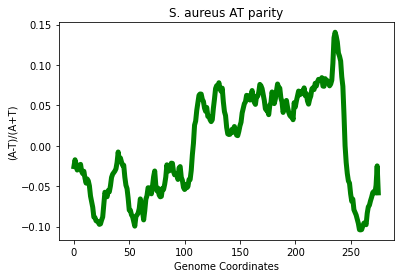

In [17]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import regex as re  

f = open('/home/christoforos/Dropbox/Teaching/BC205/files/Staaur.fa', 'r')
seq = ""
total = 0
A=T=G=C=[]
times=0;
for line in f:
	x=re.match(">", line)
	if x == None:
		length=len(line)
		total=total+length
		seq=seq+line[0:length-1]
f.close()

x=[]
ATparity=[]
window=100000
step=10000
times=int(len(seq)/step);
for i in range(times):
    x.append(i)
    DNA=seq[i*step:i*step+window]
    A=DNA.count("A")
    T=DNA.count("T")
    C=DNA.count("C")
    G=DNA.count("G")
    ATparity.append(float(A-T)/float(A+T))


# plotting points as a scatter plot
plt.plot(x, ATparity, color= "green", linewidth=5.0)
#plt.scatter(x, ATparity, color= "green")

# x-axis label
plt.xlabel('Genome Coordinates')
# frequency label
plt.ylabel('(A-T)/(A+T)')
# plot title
plt.title('S. aureus AT parity')
# showing legend
#plt.legend()

# function to show the plot
plt.show()


## Problem 4: Locating the breakpoint(s)
* Not a simple problem. In fact one (breakpoint detection) for which research is ongoing in many fields
* Things you could try:
    * Using derivation (checking the difference between each value and the previous one)
    * Density-based approaches: Trying to locate the region around which changes in the sign occur more robustly (i.e. given many different points around it)

## Concept. Binary Searches    
* Let's think of a simpler problem first:
Suppose you are given a quadratic equation: f(x)=ax**2+bx+c and you are asked to locate a root of the equation in an interval [k,m].
* How would you proceed?
* A fast and efficient way is to start by checking the values f(k) and f(m). If their product in f(k)f(m)<0 this means that the function "crosses" the x-axis at some point between k and m. How then can we locate that point?
* The answer is given by iterative splits of [k,m] in intervals that are always have the size of m-k. (That is [i=k, j=(k+m)/2] or [i=(k+m)/2, j=m]) and checking if the condition of f(i)f(j)<0 holds. If it does, we choose that interval and repeat.
* Question 1: How do we stop?
* Question 2: Is it best to use recursion or iteration?


## Exercises: To think about
* Use a genomic signature approach to locate possible HGT genes in the genome of _St. aureus_. Do your results of "outliers" differ from those obtained with the GC content approach?
* Write a program to locate the origin of replication for a given bacterial genome using the parity rules described in the lecture.
* The approach of the Genomic Signatures for k=2 works rather well because the k-mers are 16 but what about larger numbers of k (k=7 or more)? Would you use the same approach?
